 # <span style="color:blue; font-size:36px">MLP Project</span>

## <span style="color:green; font-size:30px">Title: CrimeCast: Forecasting Crime Categories</span>

<p style="color:darkblue; font-size:24px"><strong>Introduction</strong></p>
<p style="font-size:18px">In this project, we aim to develop a machine learning model that can accurately forecast different categories of crimes based on historical crime data. By leveraging advanced algorithms and data preprocessing techniques, our goal is to provide valuable insights that can help in crime prevention and resource allocation.</p>

<p style="color:darkgreen; font-size:24px"><strong>Methodology</strong></p>
<p style="font-size:18px">
<strong>1. Data Collection</strong>: The Data provided is in two sets, train and test sets, train set is having both featues and label but the test is having only Features not labels.<br>
<strong>2. Data Preprocessing</strong>: This step involved cleaning the data, handling missing values, and feature engineering.<br>
<strong>3. Model Selection</strong>: We experimented with several machine learning models, including RandomForestClassifier, GradientBoostingClassifier, and MLPClassifier.<br>
<strong>4. Hyperparameter Tuning</strong>: We used RandomizedSearchCV to find the best hyperparameters for our models.<br>
<strong>5. Model Evaluation</strong>: We evaluated the models using metrics such as accuracy, precision, recall, and F1 score.
</p>

<p style="color:darkblue; font-size:24px"><strong>Results</strong></p>
<p style="font-size:18px">The results showed that the MLPClassifier performed the best among the tested models. We achieved an accuracy of <strong>95.9% </strong> with the final model, which was trained using a combination of feature engineering and hyperparameter tuning.</p>

<p style="color:darkgreen; font-size:24px"><strong>Conclusion</strong></p>
<p style="font-size:18px">The CrimeCast project demonstrated the effectiveness of machine learning in forecasting crime categories. By utilizing advanced algorithms and thorough data analysis, we provided actionable insights that can aid in crime prevention strategies and resource management.</p>


In [1]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
# Importing Libraries

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np

# For Splitting
# from sklearn.model_selection import train_test_split

# ============================== For Cleaning and Encoding ==============================
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# ============================== For Visualizations ================================
import matplotlib.pyplot as plt
import seaborn as sns

# ============================== For sequence of actions ================================
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# ============================== Feature Engineering ==============================
from sklearn.decomposition import PCA
# ============================== For Hyperparameter Tuning ==============================
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# ====================================== Models =========================================
# ---> Dummy Classifier
from sklearn.dummy import DummyClassifier

# ---> Linear Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

# ---> Models from Support Vector Machine (SVM)
from sklearn.svm import SVC

# ---> Tree Models
from sklearn.tree import DecisionTreeClassifier


# ---> Ensemble Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from lightgbm import LGBMClassifier

#  ---> Extreme Gradient Boosting 
import xgboost as xgb
from xgboost import XGBClassifier

# ====================================== Evaluation Metrics =============================
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# others
from imblearn.over_sampling import SMOTE
from scipy.stats import uniform, randint

# for plotting map
import folium
import pandas as pd
from IPython.display import display


# Importing Data

In [3]:
train_data = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
test_data = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")
safe_init_train=train_data
safe_init_test=test_data

# Exploring Data

In [4]:
train_data.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [5]:
print("The Shape of the Training is: " , train_data.shape)
print("Number of Instances are ", train_data.shape[0])
print("Number of Features are ", train_data.shape[1])

The Shape of the Training is:  (20000, 22)
Number of Instances are  20000
Number of Features are  22


<h1 style="color:darkgreen; font-size:32px"><strong style="font-size:24px">Columns Description:</strong></h1>

<h2 style="color:darkblue; font-size:24px">* Time Details :</h2>
<p style="font-size:18px;"><strong style="font-size:20px">Date_Reported:</strong> Date the incident was reported.</p>
<p style="font-size:18px;"><strong style="font-size:20px">Date_Occurred:</strong> Date the incident occurred.</p>
<p style="font-size:18px;"><strong style="font-size:20px">Time_Occurred:</strong> Time the incident occurred in 24-hour military time.</p>

<h2 style="color:darkblue; font-size:24px">* Place Details :</h2>
<p style="font-size:18px;"><strong style="font-size:20px">Latitude:</strong> Latitude coordinates of the crime incident.</p>
<p style="font-size:18px;"><strong style="font-size:20px">Longitude:</strong> Longitude coordinates of the crime incident.</p>
<p style="font-size:18px;"><strong style="font-size:20px">Location:</strong> Street address of the crime incident.</p>
<p style="font-size:18px;"><strong style="font-size:20px">Cross_Street:</strong> Cross street of the rounded address.</p>
<p style="font-size:18px;"><strong style="font-size:20px">Reporting_District_no:</strong> Reporting district number.</p>
<p style="font-size:18px;"><strong style="font-size:20px">Area_ID:</strong> The Los Angeles Police Department <strong>LAPD's</strong> Geographic Area number.</p>
<p style="font-size:18px;"><strong style="font-size:20px">Area_Name:</strong> Name designation of the LAPD Geographic Area.</p>

<table border="1">
  <tr>
    <th>Area_ID</th>
    <th>Area_Name</th>
  </tr>
  <tr>
    <td>1</td>
    <td>Central Area</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Rampart Area</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Southwest Area</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Hollenbeck Area</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Harbor Area</td>
  </tr>
  <tr>
    <td>6</td>
    <td>Hollywood Area</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Wilshire Area</td>
  </tr>
  <tr>
    <td>8</td>
    <td>West Los Angeles Area</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Van Nuys Area</td>
  </tr>
  <tr>
    <td>10</td>
    <td>West Valley Area</td>
  </tr>
  <tr>
    <td>11</td>
    <td>Northeast Area</td>
  </tr>
  <tr>
    <td>12</td>
    <td>77th Street Area</td>
  </tr>
  <tr>
    <td>13</td>
    <td>Newton Area</td>
  </tr>
  <tr>
    <td>14</td>
    <td>Pacific Area</td>
  </tr>
  <tr>
    <td>15</td>
    <td>North Hollywood Area</td>
  </tr>
  <tr>
    <td>16</td>
    <td>Foothill Area</td>
  </tr>
  <tr>
    <td>17</td>
    <td>Devonshire Area</td>
  </tr>
  <tr>
    <td>18</td>
    <td>Southeast Area</td>
  </tr>
  <tr>
    <td>19</td>
    <td>Mission Area</td>
  </tr>
  <tr>
    <td>20</td>
    <td>Olympic Area</td>
  </tr>
  <tr>
    <td>21</td>
    <td>Topanga Area</td>
  </tr>
</table>
<p style="font-size:18px;"><strong style="font-size:20px">Premise_Code:</strong> Premise code indicating the location of the crime.</p>
<p style="font-size:18px;"><strong style="font-size:20px">Premise_Description:</strong> Description of the premise code.</p>

<h2 style="color:darkblue; font-size:24px">* Crime Details :</h2>

<p style="font-size:18px;"><strong style="font-size:20px">Part 1-2:</strong> Crime classification.</p>
<p style="font-size:18px;">part_1_crimes = [
    Criminal Homicide,
    Forcible Rape,
    Robbery,
    Aggravated Assault,
    Burglary (Breaking or Entering),
    Larceny-Theft (except motor vehicle theft),
    Motor Vehicle Theft,
    Arson
]

</p>
<p style="font-size:18px;">part_2_crimes = [
    Other Assaults (Simple),
    Forgery and Counterfeiting,
    Fraud,
    Embezzlement,
    Stolen Property: Buying, Receiving, Possessing,
    Vandalism,
    Weapons: Carrying, Possessing, etc.,
    Prostitution and Commercialized Vice,
    Sex Offenses (except forcible rape, prostitution, and commercialized vice),
    Drug Abuse Violations,
    Gambling,
    Offenses Against the Family and Children,
    Driving Under the Influence,
    Liquor Laws,
    Drunkenness,
    Disorderly Conduct,
    Vagrancy,
    All Other Offenses,
    Suspicion,
    Curfew and Loitering Laws (persons under age 18),
    Runaways (persons under age 18)
]

</p>

<p style="font-size:18px;"><strong style="font-size:20px">Modus_Operandi:</strong> Activities associated with the suspect.</p>
<p style="font-size:18px;"><strong style="font-size:20px">"modus operandi"</strong> column typically details the method or procedure a person or entity uses to achieve their goals. This term is often used in criminal investigations to describe the typical methods a criminal uses to commit crimes. In other contexts, it can describe standard practices or strategies employed by individuals or organizations.</p>
<p style="font-size:18px;">In the dataset modus operandi is given in code form </p>
<p style="font-size:18px;"><strong style="font-size:20px">Victim_Age:</strong> Age of the victim.</p>
<p style="font-size:18px;"><strong style="font-size:20px">Victim_Sex:</strong> Gender of the victim.</p>
<p style="font-size:18px;"><strong style="font-size:20px">Victim_Descent:</strong> Descent code of the victim.</p>
<table border="1">
  <tr>
    <th>Descent Code</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>A</td>
    <td>Other Asian</td>
  </tr>
  <tr>
    <td>B</td>
    <td>Black</td>
  </tr>
  <tr>
    <td>C</td>
    <td>Chinese</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Cambodian</td>
  </tr>
  <tr>
    <td>F</td>
    <td>Filipino</td>
  </tr>
  <tr>
    <td>G</td>
    <td>Guamanian</td>
  </tr>
  <tr>
    <td>H</td>
    <td>Hispanic/Latin/Mexican</td>
  </tr>
  <tr>
    <td>I</td>
    <td>American Indian/Alaskan Native</td>
  </tr>
  <tr>
    <td>J</td>
    <td>Japanese</td>
  </tr>
  <tr>
    <td>K</td>
    <td>Korean</td>
  </tr>
  <tr>
    <td>L</td>
    <td>Laotian</td>
  </tr>
  <tr>
    <td>O</td>
    <td>Other</td>
  </tr>
  <tr>
    <td>P</td>
    <td>Pacific Islander</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Samoan</td>
  </tr>
  <tr>
    <td>U</td>
    <td>Hawaiian</td>
  </tr>
  <tr>
    <td>V</td>
    <td>Vietnamese</td>
  </tr>
  <tr>
    <td>W</td>
    <td>White</td>
  </tr>
  <tr>
    <td>X</td>
    <td>Unknown</td>
  </tr>
  <tr>
    <td>Z</td>
    <td>Asian Indian</td>
  </tr>
</table>

<p style="font-size:18px;"><strong style="font-size:20px">Weapon_Used_Code:</strong> Weapon code indicating the type of weapon used.</p>
<p style="font-size:18px;"><strong style="font-size:20px">Weapon_Description:</strong> Description of the weapon code.</p>

<p style="font-size:18px;"><strong style="font-size:20px">Status:</strong> Status of the case.</p>
<p style="font-size:18px;"><strong style="font-size:20px">Status_Description:</strong> Description of the status code.</p>

<p style="font-size:18px;"><strong style="font-size:20px">Crime_Category:</strong> The category of the crime (Target Variable).</p>


# Basic Info about the Data

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

# Basic Description about the Data

In [7]:
train_data.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [8]:
data_columns=list(train_data.columns)
data_columns

['Location',
 'Cross_Street',
 'Latitude',
 'Longitude',
 'Date_Reported',
 'Date_Occurred',
 'Time_Occurred',
 'Area_ID',
 'Area_Name',
 'Reporting_District_no',
 'Part 1-2',
 'Modus_Operandi',
 'Victim_Age',
 'Victim_Sex',
 'Victim_Descent',
 'Premise_Code',
 'Premise_Description',
 'Weapon_Used_Code',
 'Weapon_Description',
 'Status',
 'Status_Description',
 'Crime_Category']

# Data Formatting and cleaning
### * Identifying correct data format for each column, 
### * Incorrect values in a column 
### * Filling the missing values in the Data 

<h1 style="font-family: Arial, sans-serif; font-size:36px; color:darkgreen;">Out Of 21 Features Avoided / Unused Features for Modelling</h1>

<ul style="font-family: 'Courier New', Courier, monospace; font-size:18px; color:#333;">
  <li><strong style="font-family: Georgia, serif; font-size:20px; color:darkblue;">Area_Name:</strong> Area_Id, which is representing a particular area is considered</li>
  <li><strong style="font-family: Georgia, serif; font-size:20px; color:darkblue;">Premise_Description:</strong> Premise_Code, which is representing a particular premise is considered</li>
  <li><strong style="font-family: Georgia, serif; font-size:20px; color:darkblue;">Location:</strong> As the latitude, longitude, Area_Id, Premise_Id, are considered no need for extra column for location again</li>
  <li><strong style="font-family: Georgia, serif; font-size:20px; color:darkblue;">Cross Street:</strong> As the latitude, longitude, Area_Id, Premise_Id, are considered no need for extra column for location again</li>

  <li><strong style="font-family: Georgia, serif; font-size:20px; color:darkblue;">Weapon_Description:</strong> Weapon_used_code, which is representing a particular weapon is considered</li>
  <li><strong style="font-family: Georgia, serif; font-size:20px; color:darkblue;">Status_Description:</strong> Status, which is representing a particular status of the case is considered</li>
</ul>

<p style="font-family: 'Courier New', Courier, monospace; font-size:20px; color:#333;">
  Total 21 <span style="font-weight:bold; color:darkblue;">{features}</span> 7 are not considered<br>
  21 - 6 = 15
</p>
 

In [9]:
considered_columns=['Latitude', 'Longitude','Date_Reported','Date_Occurred','Time_Occurred', 'Area_ID','Reporting_District_no','Part 1-2','Modus_Operandi','Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code','Weapon_Used_Code','Status','Crime_Category']
train_data=train_data[considered_columns]
train_data

,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,Crime_Category
0,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,1563.0,1.0,0385,75.0,M,W,101.0,NaN,IC,Property Crimes
1,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,400.0,IC,Property Crimes
2,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,1343.0,2.0,0329 1202,67.0,M,B,501.0,NaN,IC,Property Crimes
3,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,1924.0,1.0,0329 1300,61.0,M,H,101.0,NaN,IC,Property Crimes
4,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,400.0,IC,Property Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,05/24/2020 12:00:00 AM,05/24/2020 12:00:00 AM,700.0,3.0,303.0,2.0,0416 0446 2004 0913,51.0,M,H,501.0,400.0,IC,Violent Crimes
19996,34.2212,-118.5011,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM,259.0,10.0,1008.0,1.0,1822 0209 0344 1414 1420,0.0,M,W,301.0,NaN,IC,Property Crimes
19997,34.0571,-118.3815,09/25/2020 12:00:00 AM,09/25/2020 12:00:00 AM,1400.0,8.0,849.0,1.0,0344 1822 1420,42.0,M,H,102.0,NaN,IC,Property Crimes
19998,33.7451,-118.2835,06/10/2020 12:00:00 AM,06/10/2020 12:00:00 AM,600.0,5.0,558.0,2.0,1202 2038 0913 0602 1242 0553,76.0,F,H,501.0,NaN,IC,Crimes against Public Order


# date_conversion
   ###    -Function for converting Date, currently which is in the format  " mm/dd/yyyy/ hh:mm:ss AM/PM" to 4 new columns year, month, date, is_weekend, Time in this column is avoided because the dataset is already having time_Occurred Column    

In [10]:
def date_conversion(df, date_columns):
    if not isinstance(date_columns, list):
        raise ValueError("The 'date_columns' parameter should be a list of column names.")

    for date_column in date_columns:
        if date_column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column '{date_column}'.")

    
    for date_column in date_columns:
        date_rep_df = pd.DataFrame(df[date_column])        
        date_rep_df[date_column] = pd.to_datetime(date_rep_df[date_column], format='%m/%d/%Y %I:%M:%S %p')
        
        # Extract year, month, day, and whether the date is a weekend
        date_rep_df['Year_'+date_column[5:]] = date_rep_df[date_column].dt.year
        date_rep_df['Month_'+date_column[5:]] = date_rep_df[date_column].dt.month
        date_rep_df['Day_'+date_column[5:]] = date_rep_df[date_column].dt.day
        date_rep_df['Is_weekend_'+date_column[5:]] = date_rep_df[date_column].dt.dayofweek.isin([5, 6]).astype(int)
        
        date_rep_df = date_rep_df.drop(columns=[date_column])
        
        df = df.join(date_rep_df, how='left')
    
    df = df.drop(columns=date_columns)
    
    return df


In [11]:
date_columns = ['Date_Occurred','Date_Reported']
train_data=date_conversion(train_data,date_columns)
train_data

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,...,Status,Crime_Category,Year_Occurred,Month_Occurred,Day_Occurred,Is_weekend_Occurred,Year_Reported,Month_Reported,Day_Reported,Is_weekend_Reported
0,34.1522,-118.3910,1800.0,15.0,1563.0,1.0,0385,75.0,M,W,...,IC,Property Crimes,2020,3,6,0,2020,3,9,0
1,34.0028,-118.2391,1345.0,13.0,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,...,IC,Property Crimes,2020,2,27,0,2020,2,27,0
2,34.0111,-118.2653,605.0,13.0,1343.0,2.0,0329 1202,67.0,M,B,...,IC,Property Crimes,2020,8,21,0,2020,8,21,0
3,34.2953,-118.4590,1800.0,19.0,1924.0,1.0,0329 1300,61.0,M,H,...,IC,Property Crimes,2020,11,6,0,2020,11,8,1
4,33.9787,-118.2918,1130.0,12.0,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,...,IC,Property Crimes,2020,2,25,0,2020,2,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,700.0,3.0,303.0,2.0,0416 0446 2004 0913,51.0,M,H,...,IC,Violent Crimes,2020,5,24,1,2020,5,24,1
19996,34.2212,-118.5011,259.0,10.0,1008.0,1.0,1822 0209 0344 1414 1420,0.0,M,W,...,IC,Property Crimes,2020,12,25,0,2020,12,25,0
19997,34.0571,-118.3815,1400.0,8.0,849.0,1.0,0344 1822 1420,42.0,M,H,...,IC,Property Crimes,2020,9,25,0,2020,9,25,0
19998,33.7451,-118.2835,600.0,5.0,558.0,2.0,1202 2038 0913 0602 1242 0553,76.0,F,H,...,IC,Crimes against Public Order,2020,6,10,0,2020,6,10,0


# Checking whether the data is in correct format 

In [12]:
print("New Data Columns are: ")
data_columns=list(train_data.columns)
data_columns

New Data Columns are: 


['Latitude',
 'Longitude',
 'Time_Occurred',
 'Area_ID',
 'Reporting_District_no',
 'Part 1-2',
 'Modus_Operandi',
 'Victim_Age',
 'Victim_Sex',
 'Victim_Descent',
 'Premise_Code',
 'Weapon_Used_Code',
 'Status',
 'Crime_Category',
 'Year_Occurred',
 'Month_Occurred',
 'Day_Occurred',
 'Is_weekend_Occurred',
 'Year_Reported',
 'Month_Reported',
 'Day_Reported',
 'Is_weekend_Reported']

## Latitude

In [13]:
def replace_zero_coordinates_with_group_mean(df, target_column, group_by_columns):
    group_means = df[df[target_column] != 0].groupby(group_by_columns)[target_column].mean().reset_index()
    group_means.rename(columns={target_column: f'mean_{target_column}'}, inplace=True)
    
    df = df.merge(group_means, on=group_by_columns, how='left')
    
    zero_mask = df[target_column] == 0
    df.loc[zero_mask, target_column] = df.loc[zero_mask, f'mean_{target_column}']
    
    df.drop(columns=[f'mean_{target_column}'], inplace=True)
    
    return df

In [14]:
group_by_columns = ['Reporting_District_no', 'Area_ID', 'Premise_Code']
target_col='Latitude'
train_data=replace_zero_coordinates_with_group_mean(train_data,target_col,group_by_columns)

### For a 0 value in latitude or longitude, all three values are matched with group_by_columns then it will be replaced by their mean. If not matched it will get Nan value.

In [15]:
# checking for Nan values
train_data['Latitude'].isna().sum()


15

In [16]:
# There are Nan values, since we wrote function for replace 0.0, 
# we first fill Nan values with 0.0 and apply the same function by using 'Reporting_District_no', 'Area_ID'   
group_by_columns = ['Reporting_District_no', 'Area_ID']
target_col='Latitude'

train_data['Latitude']=train_data['Latitude'].fillna(0)
train_data=replace_zero_coordinates_with_group_mean(train_data,target_col,group_by_columns)

In [17]:
train_data['Latitude'].isna().sum()

0

## Longitude

In [18]:
group_by_columns = ['Reporting_District_no', 'Area_ID', 'Premise_Code']
target_col='Longitude'
train_data=replace_zero_coordinates_with_group_mean(train_data,target_col,group_by_columns)

In [19]:
train_data['Longitude'].isna().sum()

15

In [20]:
group_by_columns = ['Reporting_District_no', 'Area_ID']
target_col='Longitude'
# train_data['Latitude'].isna().sum()
train_data['Longitude']=train_data['Longitude'].fillna(0)
train_data=replace_zero_coordinates_with_group_mean(train_data,target_col,group_by_columns)

In [21]:
train_data['Longitude'].isna().sum()

0

## Time_Occurred

In [22]:
train_data['Time_Occurred'].unique()

array([1.800e+03, 1.345e+03, 6.050e+02, 1.130e+03, 2.560e+02, 1.840e+03,
       1.100e+03, 1.600e+03, 4.450e+02, 1.200e+03, 1.430e+03, 5.000e+02,
       2.150e+02, 9.200e+02, 1.700e+03, 1.315e+03, 1.630e+03, 1.400e+03,
       1.050e+02, 1.530e+03, 2.030e+03, 1.300e+03, 2.300e+03, 2.230e+03,
       2.130e+03, 7.300e+02, 2.100e+03, 2.215e+03, 8.300e+02, 8.000e+02,
       1.730e+03, 1.500e+01, 2.359e+03, 2.055e+03, 1.400e+02, 2.251e+03,
       1.930e+03, 1.330e+03, 4.200e+02, 1.500e+03, 2.000e+03, 2.330e+03,
       1.710e+03, 1.260e+02, 1.230e+03, 1.220e+03, 1.831e+03, 3.000e+01,
       1.736e+03, 2.400e+02, 4.300e+02, 1.143e+03, 9.300e+02, 8.500e+02,
       1.950e+03, 1.340e+03, 9.400e+02, 7.500e+02, 1.205e+03, 1.455e+03,
       1.448e+03, 1.650e+03, 5.000e+00, 1.830e+03, 3.240e+02, 3.000e+02,
       1.250e+03, 1.415e+03, 8.050e+02, 1.945e+03, 1.845e+03, 1.900e+03,
       1.000e+03, 1.120e+03, 1.505e+03, 6.000e+02, 2.000e+02, 3.450e+02,
       8.140e+02, 9.150e+02, 2.200e+03, 1.910e+03, 

In [23]:
train_data['Time_Occurred'].value_counts().index
# It is in Correct format

Index([1200.0, 1700.0, 1800.0, 2000.0, 1900.0, 2100.0, 2200.0, 1500.0, 1600.0,
       1400.0,
       ...
        124.0, 2156.0,  412.0, 1221.0,  313.0,  823.0,  237.0, 1044.0, 2056.0,
        259.0],
      dtype='float64', name='Time_Occurred', length=996)

## Area_Id 

In [24]:
train_data['Area_ID'].value_counts()

Area_ID
12.0    1345
14.0    1157
1.0     1156
3.0     1130
18.0    1067
15.0    1065
6.0     1014
13.0     999
20.0     960
7.0      943
2.0      931
8.0      910
9.0      902
5.0      872
19.0     870
11.0     839
21.0     792
10.0     790
17.0     769
4.0      755
16.0     734
Name: count, dtype: int64

In [25]:
train_data['Area_ID'].unique()
# It is in Correct format

array([15., 13., 19., 12., 11.,  4., 14.,  9., 17.,  7.,  6.,  5., 21.,
        1., 10., 20., 16.,  8., 18.,  3.,  2.])

## Part 1-2

In [26]:
train_data['Part 1-2'].value_counts()

Part 1-2
1.0    11637
2.0     8363
Name: count, dtype: int64

In [27]:
train_data['Part 1-2'].unique()
# It is in Correct format

array([1., 2.])

## Premise_Code

In [28]:
train_data['Premise_Code'].value_counts()

Premise_Code
101.0    5033
501.0    3379
502.0    2491
108.0    1437
102.0     978
         ... 
214.0       1
909.0       1
896.0       1
744.0       1
250.0       1
Name: count, Length: 217, dtype: int64

In [29]:
train_data['Premise_Code'].unique()
# It is in Correct format

array([101., 216., 501., 401., 502., 202., 104., 108., 121., 102., 203.,
       122., 707., 503., 506., 509., 710., 103., 602., 519., 406., 751.,
       210., 123., 801., 601., 243., 242., 504., 124., 505., 119., 252.,
       109., 704., 152., 120., 301., 404., 720., 405., 402., 213., 514.,
       248., 702., 708., 834., 212., 416., 954., 158., 403., 701., 721.,
       725., 605., 726., 912., 729., 139., 145., 208., 719., 201., 141.,
       107., 222., 144., 116., 507., 221., 254., 757., 217., 110., 408.,
       146., 510., 750., 229., 727., 249., 236., 738., 516., 735., 716.,
       908., 232., 517., 722., 515., 874., 518., 118., 127., 151., 932.,
       411., 415., 910., 414., 220., 255., 407., 239., 156., 233., 717.,
       900., 956., 949., 218., 732., 936., 244., 835., 715., 410., 231.,
       728., 417., 207., 247., 206., 913., 733., 409., 811., 235., 724.,
       902., 712., 941., 117., 412., 705., 512., 907., 142., 903., 953.,
       511., 753., 736., 205., 897., 875., 138., 70

## Status

In [30]:
train_data['Status'].value_counts()

Status
IC    15236
AO     2597
AA     2054
JA       70
JO       43
Name: count, dtype: int64

In [31]:
train_data['Status'].unique()
# It is in Correct format

array(['IC', 'AO', 'AA', 'JA', 'JO'], dtype=object)

## Victim_Age

In [32]:
train_data['Victim_Age'].value_counts()

Victim_Age
 0.0     4828
 30.0     448
 31.0     446
 26.0     442
 29.0     425
         ... 
 98.0       2
-2.0        2
 92.0       2
 96.0       2
 94.0       2
Name: count, Length: 100, dtype: int64

In [33]:
train_data['Victim_Age'].unique()

array([75., 41., 67., 61.,  0., 50., 68., 22., 31., 46., 72., 26., 38.,
       37., 42., 40., 53., 60., 29., 13., 33., 27., 15., 23., 74., 63.,
       78., 51., 44., 34., 69., 36., 52., 25., 49., 48., 32., 18., 35.,
       24., 39., 16., 28., 47., 30., 64., 76.,  5., 58., 45., 57., 19.,
       55., 54., 21., 65., 17., 20., 77., 82., 56., -2., 84., 59., 43.,
        7., 70., 66., 62., 14., 80., 71., 81., 96., 12., 11.,  4., 83.,
       10.,  8.,  6., 88., 86., 73.,  9., 87., 85., 93., 95., 99., 79.,
        3.,  2., 91., 92., 90., 89., 98., -1., 94.])

### fill_negative_ages function
#### If we observe the victim_age column there are values which are negative, which is incorrect, age can't be in negatives.
 
 
#### One of the good ways to solve this is filling negatives in the column with mean age of the column  

In [34]:
def fill_negative_ages(df, column_name, mean_value):
    df[column_name] = df[column_name].apply(lambda x: mean_value if x < 0 else x)
    return df


In [35]:
mean_age_to_fill = train_data['Victim_Age'][train_data['Victim_Age'] >= 0].mean()
train_data = fill_negative_ages(train_data, 'Victim_Age', mean_age_to_fill)

In [36]:
print("Mean of age whose age is greater than 0 ",mean_age_to_fill)

Mean of age whose age is greater than 0  30.1444433329999


## Victim_Sex

In [37]:
train_data['Victim_Sex'].value_counts()

Victim_Sex
M    8538
F    7176
X    1660
H       2
Name: count, dtype: int64

In [38]:
train_data['Victim_Sex'].unique()

array(['M', 'X', 'F', nan, 'H'], dtype=object)

In [39]:
simple_imputer_gender_mode = SimpleImputer(strategy="most_frequent")
simple_imputer_gender_mode .fit(train_data[['Victim_Sex']])
train_data[['Victim_Sex']] = simple_imputer_gender_mode .transform(train_data[['Victim_Sex']])


In [40]:
train_data['Victim_Sex'].isna().sum()

0

## Victim_Descent 

In [41]:
train_data['Victim_Descent'].value_counts()

Victim_Descent
H    6143
W    4245
B    2881
X    1849
O    1603
A     427
K      83
C      51
F      48
J      16
I      11
V       8
P       4
Z       3
U       2
D       1
G       1
Name: count, dtype: int64

In [42]:
train_data['Victim_Descent'].unique()

array(['W', 'H', 'B', 'X', nan, 'O', 'A', 'K', 'C', 'F', 'I', 'J', 'Z',
       'V', 'P', 'D', 'U', 'G'], dtype=object)

In [43]:
simple_imputer_descent_mode=SimpleImputer(strategy="most_frequent")
simple_imputer_descent_mode.fit(train_data[['Victim_Descent']])
train_data[['Victim_Descent']]=simple_imputer_descent_mode.transform(train_data[['Victim_Descent']])


In [44]:
train_data['Victim_Descent'].isna().sum()

0

## Weapon_Used_code

In [45]:
train_data['Weapon_Used_Code'].value_counts()

Weapon_Used_Code
400.0    3990
500.0     789
511.0     546
102.0     388
200.0     160
109.0     154
106.0     131
207.0     125
307.0      84
512.0      80
306.0      63
212.0      55
312.0      52
304.0      51
308.0      49
205.0      45
201.0      43
114.0      41
204.0      37
302.0      37
113.0      35
101.0      34
301.0      26
310.0      26
215.0      25
223.0      24
311.0      23
219.0      23
506.0      22
107.0      18
515.0      18
218.0      17
305.0      16
221.0      14
216.0      13
103.0      12
309.0      11
112.0       8
104.0       7
514.0       7
211.0       6
513.0       4
303.0       4
510.0       3
206.0       3
508.0       2
504.0       2
105.0       2
214.0       2
503.0       1
501.0       1
202.0       1
111.0       1
210.0       1
122.0       1
115.0       1
213.0       1
Name: count, dtype: int64

In [46]:
train_data['Weapon_Used_Code'].unique()

array([ nan, 400., 511., 207., 102., 500., 307., 506., 312., 200., 302.,
       304., 109., 306., 215., 106., 114., 112., 305., 223., 204., 311.,
       515., 512., 218., 309., 212., 205., 103., 201., 219., 308., 113.,
       301., 310., 211., 214., 101., 107., 216., 111., 221., 104., 303.,
       206., 514., 105., 503., 510., 504., 501., 202., 513., 508., 210.,
       122., 115., 213.])

In [47]:
simple_imputer_weapon_code_mean=SimpleImputer(strategy="mean")
simple_imputer_weapon_code_mean.fit(train_data[["Weapon_Used_Code"]])
train_data[["Weapon_Used_Code"]]=simple_imputer_weapon_code_mean.transform(train_data[["Weapon_Used_Code"]])

In [48]:
train_data['Weapon_Used_Code'].isna().sum()


0

### * Year_Occurred,
### * Month_Occurred
### * Day_Occurred
### * Is_weekend_Occurred
### * Year_Reported
### * Month_Reported
### * Day_Reported
### * Is_weekend_Reported
#### are the columns which we have inserted, they are in correct format 


In [49]:
columns_subset=train_data.columns
columns_subset=list(columns_subset)
# Modus_Operandi column is going to change into many other columns so remove it from columns_subset
columns_subset.remove('Modus_Operandi')
columns_subset

['Latitude',
 'Longitude',
 'Time_Occurred',
 'Area_ID',
 'Reporting_District_no',
 'Part 1-2',
 'Victim_Age',
 'Victim_Sex',
 'Victim_Descent',
 'Premise_Code',
 'Weapon_Used_Code',
 'Status',
 'Crime_Category',
 'Year_Occurred',
 'Month_Occurred',
 'Day_Occurred',
 'Is_weekend_Occurred',
 'Year_Reported',
 'Month_Reported',
 'Day_Reported',
 'Is_weekend_Reported']

## Modus_Operandi Column 

### It indicates what kind of crime that a suspect already involved in or activities associated with the suspect. It is given in a list of codes. so we will split it into a new column for each activity code

In [50]:
print(train_data['Modus_Operandi'][4])

0416 0945 1822 0400 0417 0344


### It will create 5 new columns corresponding to 0416 0945 1822 0400 0417 0344, the same will done for all values present in this column
### For achieving this we created a function modus_operandi_column_conversion

In [51]:
def modus_operandi_column_conversion(df):
    if 'Modus_Operandi' not in df.columns:
        raise ValueError("The DataFrame does not contain the 'Modus_Operandi' column.")

    df_mod_ope = pd.DataFrame(df['Modus_Operandi'])
    df_mod_ope = df_mod_ope.fillna('0')
    
    if df_mod_ope.isna().sum().sum() > 0:
        raise ValueError("There are still NaN values in the DataFrame after filling.")
    
    df_mod_ope['Modus_Operandi'] = df_mod_ope['Modus_Operandi'].str.split()
    binary_matrix = df_mod_ope['Modus_Operandi'].apply(lambda x: pd.Series(1, index=x)).fillna(0)
    df_mod_ope = df_mod_ope.drop(columns=['Modus_Operandi']).join(binary_matrix)
    
    if '0' in df_mod_ope.columns:
        df_mod_ope = df_mod_ope.drop(columns=['0'])
    
    
    df_transformed = df.join(df_mod_ope, how='left')
    df_transformed.drop('Modus_Operandi',axis=1,inplace=True)
    return df_transformed


In [52]:
train_data=modus_operandi_column_conversion(train_data)
train_data

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,...,1303,2013,0350,1006,1224,0372,2104,2023,1277,0425
0,34.1522,-118.3910,1800.0,15.0,1563.0,1.0,75.0,M,W,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34.0028,-118.2391,1345.0,13.0,1367.0,1.0,41.0,M,H,216.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0111,-118.2653,605.0,13.0,1343.0,2.0,67.0,M,B,501.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,34.2953,-118.4590,1800.0,19.0,1924.0,1.0,61.0,M,H,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33.9787,-118.2918,1130.0,12.0,1245.0,1.0,0.0,X,X,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,700.0,3.0,303.0,2.0,51.0,M,H,501.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,34.2212,-118.5011,259.0,10.0,1008.0,1.0,0.0,M,W,301.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,34.0571,-118.3815,1400.0,8.0,849.0,1.0,42.0,M,H,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,33.7451,-118.2835,600.0,5.0,558.0,2.0,76.0,F,H,501.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
print("Number of Nan Values present in the dataset are : ",train_data.isna().sum().sum())


Number of Nan Values present in the dataset are :  0


# Storing the data for safty reasons 

In [54]:
safe_train=train_data.copy()
safe_train

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,...,1303,2013,0350,1006,1224,0372,2104,2023,1277,0425
0,34.1522,-118.3910,1800.0,15.0,1563.0,1.0,75.0,M,W,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34.0028,-118.2391,1345.0,13.0,1367.0,1.0,41.0,M,H,216.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0111,-118.2653,605.0,13.0,1343.0,2.0,67.0,M,B,501.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,34.2953,-118.4590,1800.0,19.0,1924.0,1.0,61.0,M,H,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33.9787,-118.2918,1130.0,12.0,1245.0,1.0,0.0,X,X,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,700.0,3.0,303.0,2.0,51.0,M,H,501.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,34.2212,-118.5011,259.0,10.0,1008.0,1.0,0.0,M,W,301.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,34.0571,-118.3815,1400.0,8.0,849.0,1.0,42.0,M,H,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,33.7451,-118.2835,600.0,5.0,558.0,2.0,76.0,F,H,501.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### After filling cleaning test data we will OneHot Encode Victim_Sex, Victim_Descent,Status, there might be case that the test data may be unseen, which create problem for Training our model
### We will store the unique values to check for unseen testdata

In [55]:
train_victim_sex=list(safe_train['Victim_Sex'].unique())
print(train_victim_sex)
train_victim_descent=list(safe_train['Victim_Descent'].unique())
print(train_victim_descent)
train_status=list(safe_train['Status'].unique())
print(train_status)



['M', 'X', 'F', 'H']
['W', 'H', 'B', 'X', 'O', 'A', 'K', 'C', 'F', 'I', 'J', 'Z', 'V', 'P', 'D', 'U', 'G']
['IC', 'AO', 'AA', 'JA', 'JO']


# Visualizations

### Creating a copy of data for visualizations


In [56]:
df_visual=train_data.copy()
df_visual

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,...,1303,2013,0350,1006,1224,0372,2104,2023,1277,0425
0,34.1522,-118.3910,1800.0,15.0,1563.0,1.0,75.0,M,W,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34.0028,-118.2391,1345.0,13.0,1367.0,1.0,41.0,M,H,216.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0111,-118.2653,605.0,13.0,1343.0,2.0,67.0,M,B,501.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,34.2953,-118.4590,1800.0,19.0,1924.0,1.0,61.0,M,H,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33.9787,-118.2918,1130.0,12.0,1245.0,1.0,0.0,X,X,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,700.0,3.0,303.0,2.0,51.0,M,H,501.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,34.2212,-118.5011,259.0,10.0,1008.0,1.0,0.0,M,W,301.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,34.0571,-118.3815,1400.0,8.0,849.0,1.0,42.0,M,H,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,33.7451,-118.2835,600.0,5.0,558.0,2.0,76.0,F,H,501.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.Visalization of Locations

### There are 20000 rows of data, it is difficult to plot that many locations, so we will places which witnessed more than 3 crimes

In [57]:
# As we have loction in two different columns we will merge them into a single column named coordinates
df_visual['coordinates'] = df_visual.apply(lambda row: f"({row['Latitude']}, {row['Longitude']})", axis=1)
con=(df_visual['coordinates'].value_counts()>3)
index_array = np.nonzero(con)[0]

In [58]:
df_filter=df_visual.iloc[index_array]
df_filter

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,...,2013,0350,1006,1224,0372,2104,2023,1277,0425,coordinates
0,34.1522,-118.3910,1800.0,15.0,1563.0,1.0,75.0,M,W,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(34.1522, -118.391)"
1,34.0028,-118.2391,1345.0,13.0,1367.0,1.0,41.0,M,H,216.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(34.0028, -118.2391)"
2,34.0111,-118.2653,605.0,13.0,1343.0,2.0,67.0,M,B,501.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(34.0111, -118.2653)"
3,34.2953,-118.4590,1800.0,19.0,1924.0,1.0,61.0,M,H,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(34.2953, -118.459)"
4,33.9787,-118.2918,1130.0,12.0,1245.0,1.0,0.0,X,X,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(33.9787, -118.2918)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,34.0274,-118.2900,1200.0,3.0,338.0,1.0,35.0,M,W,707.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(34.0274, -118.29)"
661,34.1794,-118.3834,1425.0,15.0,1526.0,1.0,0.0,M,H,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(34.1794, -118.3834)"
662,34.1685,-118.4509,1310.0,9.0,952.0,2.0,12.0,F,A,720.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(34.1685, -118.4509)"
663,34.0598,-118.2979,1530.0,20.0,2035.0,1.0,0.0,X,X,721.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(34.0598, -118.2979)"


In [59]:
df = df_filter
crime_categories = df['Crime_Category'].unique()

# Generate a color palette
colors = plt.colormaps['tab10'].colors


# Create a mapping of crime categories to predefined Folium colors
predefined_colors = [
    'red', 'blue', 'green', 'orange', 'purple', 'darkred', 'darkgreen', 
    'lightred', 'lightgreen', 'lightblue', 'gray', 'black'
]


color_map = {category: f'#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}' for category, (r, g, b) in zip(crime_categories, colors)}

# Create a base map
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=5)

# Create a mapping of crime categories to predefined colors
category_color_map = {category: predefined_colors[i % len(predefined_colors)] for i, category in enumerate(crime_categories)}


# Add points to the map with colors based on the crime category using Marker
for _, row in df.iterrows():
    icon_color = category_color_map[row['Crime_Category']]
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        icon=folium.Icon(color=icon_color),  
        popup=row['Crime_Category']
    ).add_to(m)

legend_html = '<div style="position: fixed; bottom: 10px; left: 10px; width: 150px; height: auto; background-color: white; border:2px solid black; z-index:9999; font-size:14px; padding: 10px;"><b>Crime Categories</b><br>'
for category, color in color_map.items():
    legend_html += f'<i style="background: {color}; width: 20px; height: 20px; display: inline-block; border-radius: 50%;"></i> {category}<br>'
legend_html += '</div>'

# Add legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Fit the map to the bounds of the data points
bounds = [[df['Latitude'].min(), df['Longitude'].min()], [df['Latitude'].max(), df['Longitude'].max()]]
m.fit_bounds(bounds)

m.save('map_with_legend.html')

display(m)


## 2.Visualization of Time_Occurred

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


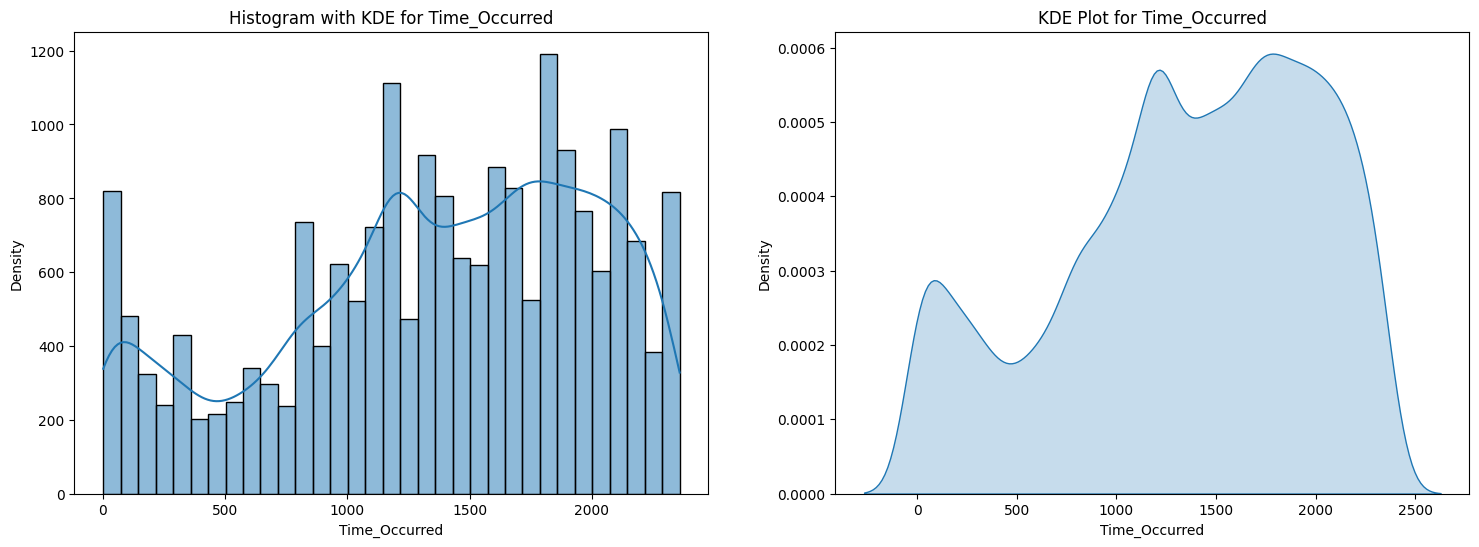

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Histogram with KDE
sns.histplot(data=df_visual, x='Time_Occurred', kde=True, ax=axs[0])
axs[0].set_title('Histogram with KDE for Time_Occurred')
axs[0].set_xlabel('Time_Occurred')
axs[0].set_ylabel('Density')

# KDE Plot
sns.kdeplot(data=df_visual, x='Time_Occurred', fill=True, ax=axs[1])
axs[1].set_title('KDE Plot for Time_Occurred')
axs[1].set_xlabel('Time_Occurred')
axs[1].set_ylabel('Density')


# Display the plots
plt.show()

## 3.Visualization of Victim_Age

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


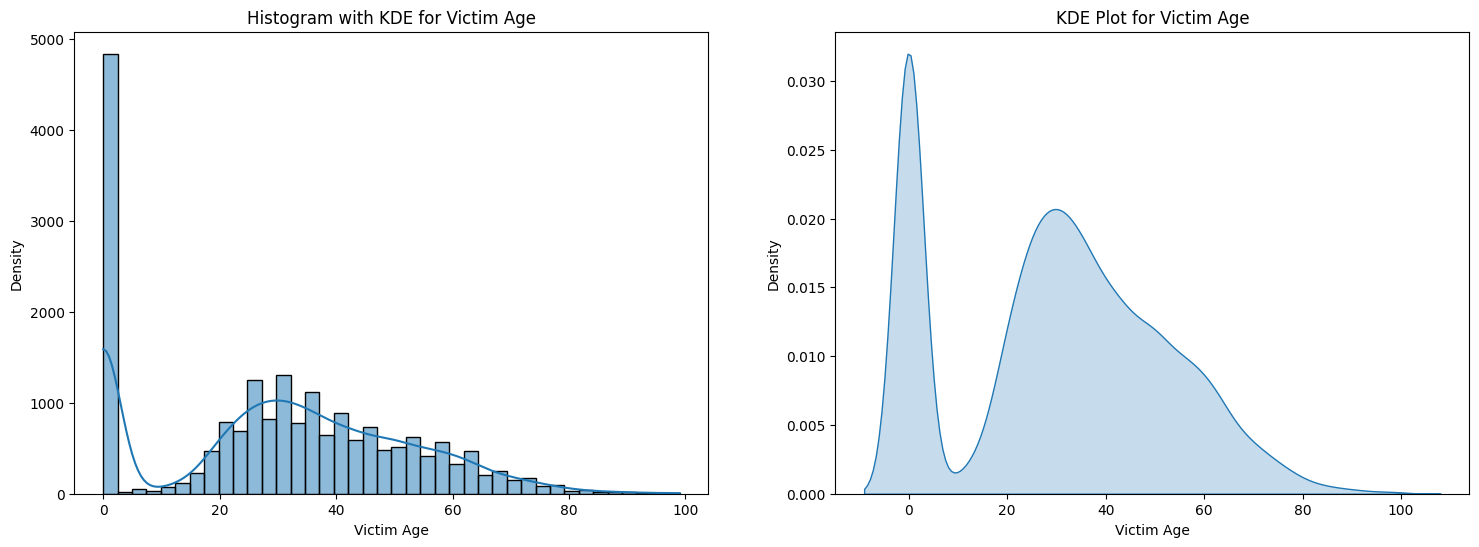

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Histogram with KDE
sns.histplot(data=df_visual, x='Victim_Age', kde=True, ax=axs[0])
axs[0].set_title('Histogram with KDE for Victim Age')
axs[0].set_xlabel('Victim Age')
axs[0].set_ylabel('Density')

# KDE Plot
sns.kdeplot(data=df_visual, x='Victim_Age', fill=True, ax=axs[1])
axs[1].set_title('KDE Plot for Victim Age')
axs[1].set_xlabel('Victim Age')
axs[1].set_ylabel('Density')



# Display the plots
plt.show()

## 4.Visualization of Victim_Sex

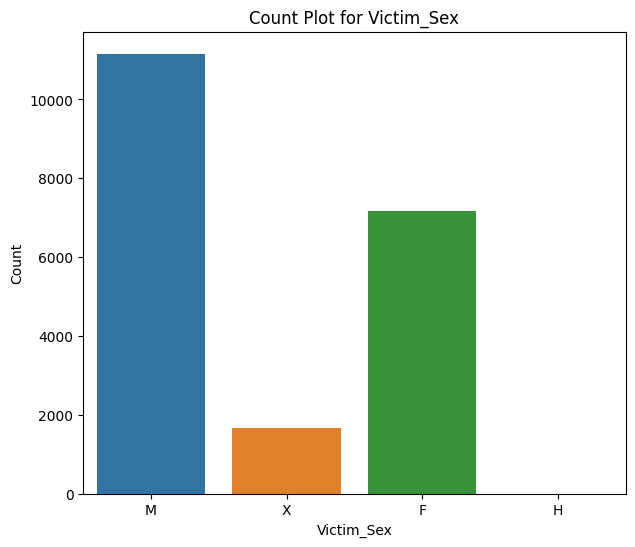

In [62]:
plt.figure(figsize=(7, 6))  
sns.countplot(data=df_visual, x='Victim_Sex')

plt.title('Count Plot for Victim_Sex')
plt.xlabel('Victim_Sex')
plt.ylabel('Count')

plt.show()

## 5.Visualization of Victim_Descent

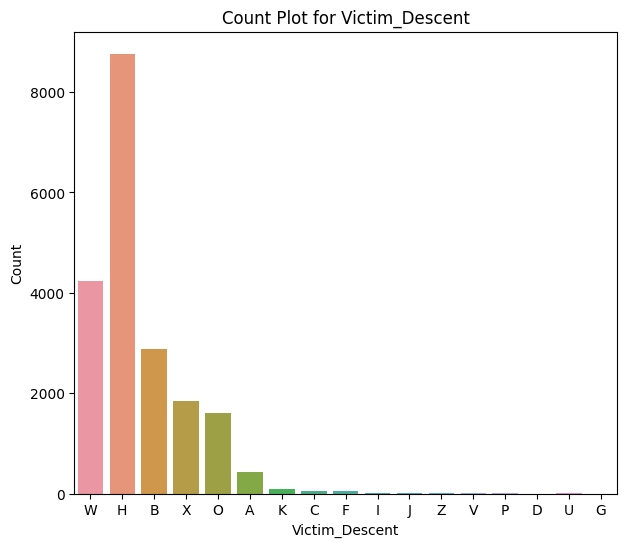

In [63]:
plt.figure(figsize=(7, 6))  
sns.countplot(data=df_visual, x='Victim_Descent')

plt.title('Count Plot for Victim_Descent')
plt.xlabel('Victim_Descent')
plt.ylabel('Count')

plt.show()

## 6.Visualization of Type of crime [1, 2]

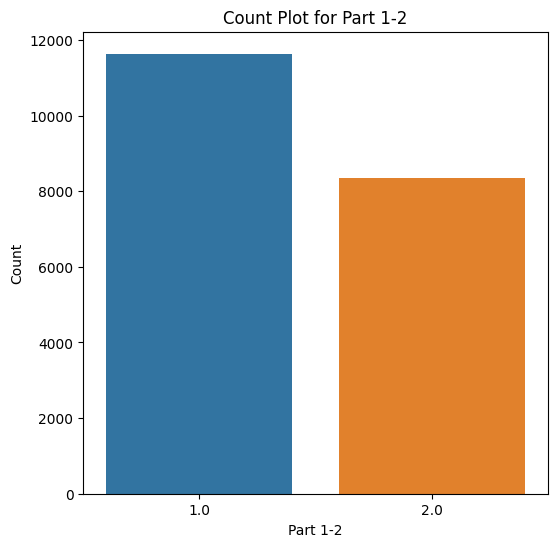

In [64]:
plt.figure(figsize=(6, 6))  
sns.countplot(data=df_visual, x='Part 1-2')

plt.title('Count Plot for Part 1-2')
plt.xlabel('Part 1-2')
plt.ylabel('Count')

plt.show()

## 7.Visualization for Status

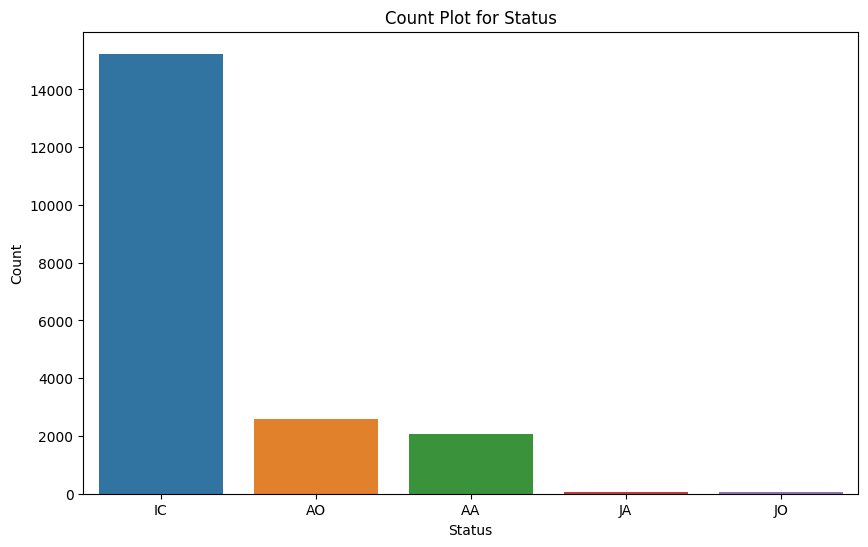

In [65]:
plt.figure(figsize=(10, 6))  
sns.countplot(data=df_visual, x='Status')

plt.title('Count Plot for Status')
plt.xlabel('Status')
plt.ylabel('Count')

plt.show()


## 8.Visualization of Number of Crimes across Months

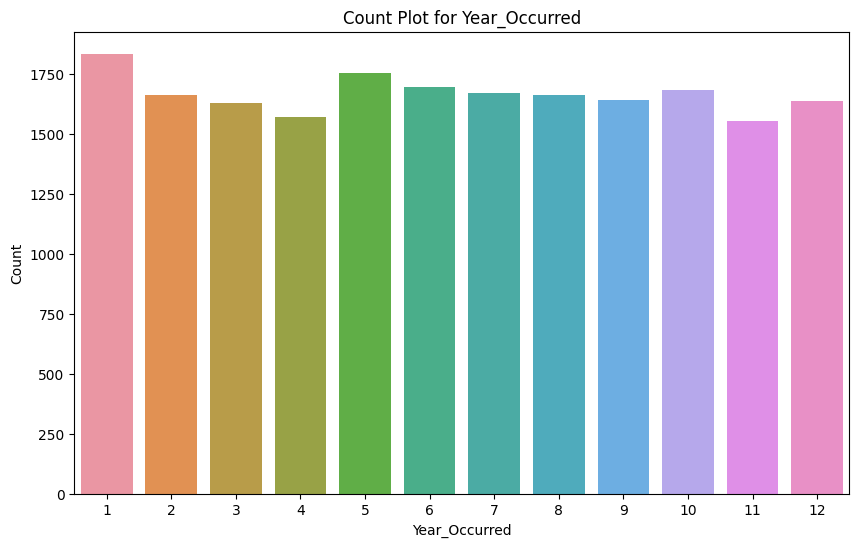

In [66]:
plt.figure(figsize=(10, 6))  
sns.countplot(data=df_visual, x='Month_Occurred')

plt.title('Count Plot for Year_Occurred')
plt.xlabel('Year_Occurred')
plt.ylabel('Count')

plt.show()

## 9.Visualization of Number of Crimes across Days of a Month

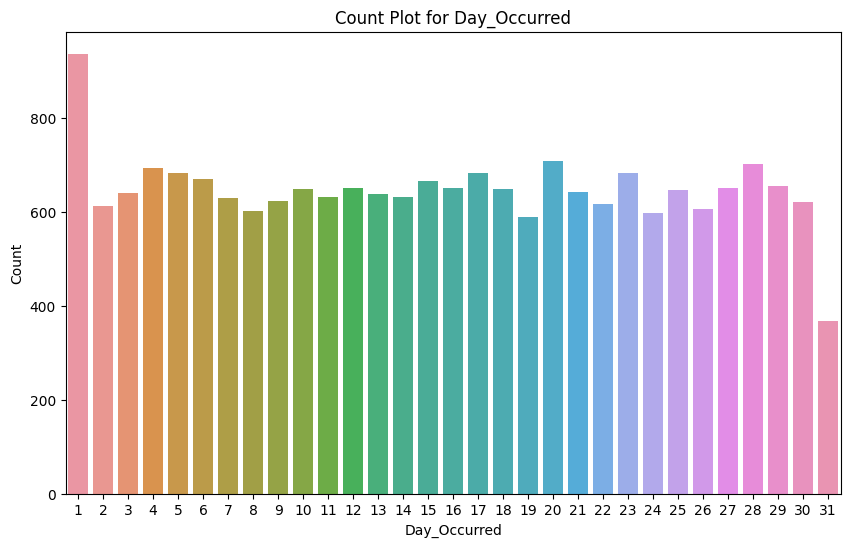

In [67]:
plt.figure(figsize=(10, 6))  
sns.countplot(data=df_visual, x='Day_Occurred')

plt.title('Count Plot for Day_Occurred')
plt.xlabel('Day_Occurred')
plt.ylabel('Count')

plt.show()

## 10.Visualization of Number of Crimes Vs Is Weekend

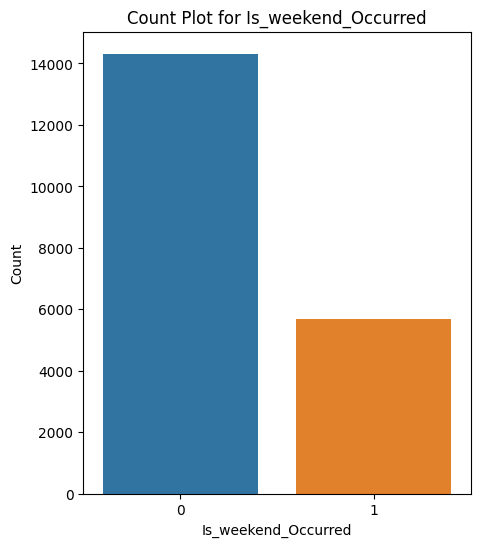

In [68]:
plt.figure(figsize=(5, 6))  
sns.countplot(data=df_visual, x='Is_weekend_Occurred')

plt.title('Count Plot for Is_weekend_Occurred')
plt.xlabel('Is_weekend_Occurred')
plt.ylabel('Count')

plt.show()


## 13.Visualization of Crime Category

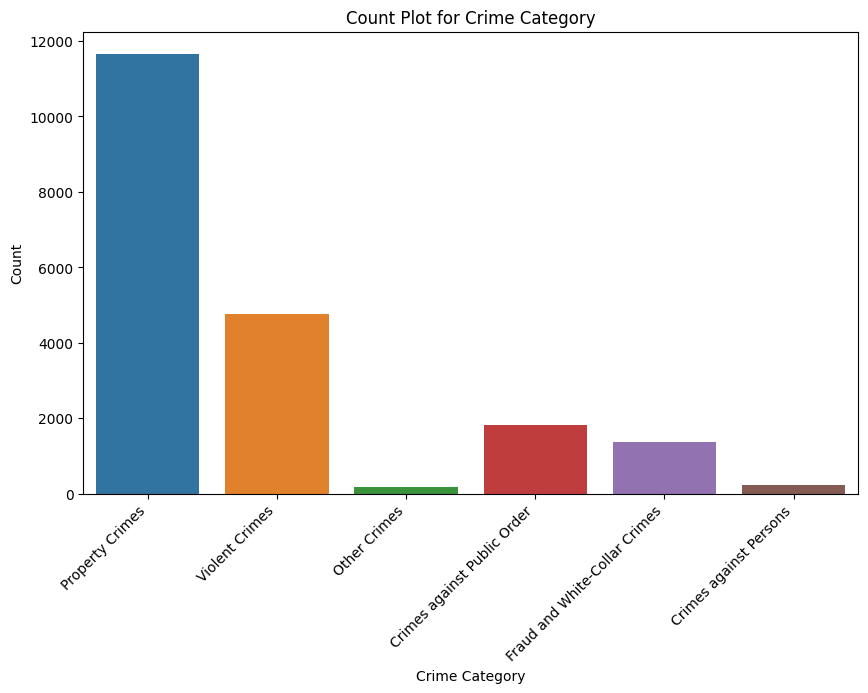

In [69]:
plt.figure(figsize=(10, 6))  
sns.countplot(data=df_visual, x='Crime_Category')

plt.title('Count Plot for Crime Category')
plt.xlabel('Crime Category')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')
plt.show()

# Test Data

In [70]:
test_data

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4600 MASCOT ST,NaN,34.0409,-118.3408,06/05/2020 12:00:00 AM,06/04/2020 12:00:00 AM,2100.0,7.0,Wilshire,775.0,...,NaN,0.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont
4996,2200 E 7TH ST,NaN,34.0347,-118.2253,12/02/2020 12:00:00 AM,11/25/2020 12:00:00 AM,1530.0,4.0,Hollenbeck,471.0,...,1300 0325,0.0,X,X,116.0,OTHER/OUTSIDE,NaN,NaN,IC,Invest Cont
4997,LANGDON AV,TUPPER ST,34.2392,-118.4698,11/21/2020 12:00:00 AM,11/21/2020 12:00:00 AM,2100.0,19.0,Mission,1961.0,...,0913 1817 0416,38.0,M,H,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest
4998,400 E 5TH ST,NaN,34.0453,-118.2443,03/01/2020 12:00:00 AM,02/29/2020 12:00:00 AM,2335.0,1.0,Central,147.0,...,0416,41.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,AO,Adult Other


## Cleaning Missing data 

In [71]:
test_data.isna().sum()

Location                    0
Cross_Street             4190
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Area_Name                   0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi            684
Victim_Age                  0
Victim_Sex                643
Victim_Descent            643
Premise_Code                0
Premise_Description         1
Weapon_Used_Code         3153
Weapon_Description       3153
Status                      0
Status_Description          0
dtype: int64

## Test Victim_Age

In [72]:
test_data['Victim_Age'].unique()

array([28., 26., 62.,  0., 37., 58., 21., 19., 31., 35., 25., 27., 20.,
       67., 36., 15., 24., 53., 30., 38., 71., 34., 16., 33., 32., 77.,
       39., 52., 23., 61., 50., 63., 45., 22., 73., 40., 60., 55., 29.,
       41., 51., 46., -2., 44., 99., 81., 43., 57., 12., 79., 93., 65.,
       54., 59., 83., 64., 49., 56., 47., 42., 70., 78., 68., 80., 18.,
       96., 48., 74., 76., 11., 14., 66., 72.,  7., 10.,  6., 69., 17.,
       82.,  5.,  9.,  4., 85., 75., 88.,  8., 86., 13.,  3.,  2., -1.,
       84., 90., 91.])

#### we have already defined fill_negative_ages function above by using that function we will negative value in the test data by mean of train data

In [73]:
test_data=fill_negative_ages(test_data,'Victim_Age',train_data['Victim_Age'].mean())

## Test Latitude 
### Here we need to fill with grouped mean based on group_by_columns of train data not test data, for achieving this, create a fucntion as follow

In [74]:
def calculate_group_means(train_df, target_column, group_by_columns):
    group_means = train_df[train_df[target_column] != 0].groupby(group_by_columns)[target_column].mean().reset_index()
    group_means.rename(columns={target_column: f'mean_{target_column}'}, inplace=True)
    return group_means

def replace_zero_coordinates_with_group_mean(test_df, group_means, target_column, group_by_columns):
    test_df = test_df.merge(group_means, on=group_by_columns, how='left')
    
    # Replace 0 values in the target column with the corresponding group mean
    zero_mask = test_df[target_column] == 0
    test_df.loc[zero_mask, target_column] = test_df.loc[zero_mask, f'mean_{target_column}']
    
    test_df.drop(columns=[f'mean_{target_column}'], inplace=True)
    
    return test_df


In [75]:
group_by_columns = ['Reporting_District_no', 'Area_ID', 'Premise_Code']
target_col='Latitude'
train_group_means = calculate_group_means(train_data, target_col, group_by_columns)
test_data = replace_zero_coordinates_with_group_mean(test_data, train_group_means, target_col, group_by_columns)


### Same as train data, For a 0 value in latitude or longitude, all three values are matched with group_by_columns then it will be replaced by their mean. If not matched it will get Nan value.

In [76]:
test_data['Latitude'].isna().sum()

5

In [77]:
# There are Nan values, since we wrote function for replace 0.0, 
# we first fill Nan values with 0.0 and apply the same function by using 'Reporting_District_no', 'Area_ID'
test_data['Latitude']=test_data['Latitude'].fillna(0)

In [78]:
group_by_columns = ['Reporting_District_no', 'Area_ID']
target_col='Latitude'
train_group_means = calculate_group_means(train_data, target_col, group_by_columns)
test_data = replace_zero_coordinates_with_group_mean(test_data, train_group_means, target_col, group_by_columns)


In [79]:
test_data['Latitude'].isna().sum()

0

## Test Longitude

In [80]:
group_by_columns = ['Reporting_District_no', 'Area_ID', 'Premise_Code']
target_col='Longitude'
train_group_means = calculate_group_means(train_data, target_col, group_by_columns)
test_data = replace_zero_coordinates_with_group_mean(test_data, train_group_means, target_col, group_by_columns)


In [81]:
test_data['Longitude'].isna().sum()

5

In [82]:
test_data['Longitude'] = test_data['Longitude'].fillna(0)

In [83]:
group_by_columns = ['Reporting_District_no', 'Area_ID']
target_col='Longitude'
train_group_means = calculate_group_means(train_data, target_col, group_by_columns)
test_data = replace_zero_coordinates_with_group_mean(test_data, train_group_means, target_col, group_by_columns)


In [84]:
test_data['Latitude'].isna().sum()

0

## Considering The columns Which are considered in Train Data

In [85]:
# Consider the only columns which are considered in train_data
considered_test_columns=considered_columns
# as we don't have crime category column in test data we will remove it
considered_test_columns.remove("Crime_Category")
considered_test_columns

['Latitude',
 'Longitude',
 'Date_Reported',
 'Date_Occurred',
 'Time_Occurred',
 'Area_ID',
 'Reporting_District_no',
 'Part 1-2',
 'Modus_Operandi',
 'Victim_Age',
 'Victim_Sex',
 'Victim_Descent',
 'Premise_Code',
 'Weapon_Used_Code',
 'Status']

## Date Formatting as done in Train data

In [86]:
test_data=test_data[considered_test_columns]
test_data=date_conversion(test_data,['Date_Reported','Date_Occurred'])
test_data

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,...,Weapon_Used_Code,Status,Year_Reported,Month_Reported,Day_Reported,Is_weekend_Reported,Year_Occurred,Month_Occurred,Day_Occurred,Is_weekend_Occurred
0,34.0128,-118.3045,2000.0,3.0,376.0,2.0,0416 1241 1243 1813 1821 2000,28.0,F,H,...,400.0,IC,2020,3,3,0,2020,3,3,0
1,34.0726,-118.3029,1700.0,20.0,2014.0,1.0,0344 0394,26.0,M,B,...,NaN,IC,2020,6,1,0,2020,4,25,1
2,33.9348,-118.2695,900.0,18.0,1844.0,2.0,1822 0701 1914 0355 1202 0100,62.0,F,B,...,NaN,IC,2020,8,28,0,2020,8,27,0
3,34.0497,-118.3442,2200.0,7.0,765.0,1.0,NaN,0.0,NaN,NaN,...,NaN,IC,2020,12,23,0,2020,12,3,0
4,34.1611,-118.3704,130.0,15.0,1555.0,2.0,1501,37.0,F,W,...,NaN,AO,2020,8,30,1,2020,8,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,34.0409,-118.3408,2100.0,7.0,775.0,1.0,NaN,0.0,NaN,NaN,...,NaN,IC,2020,6,5,0,2020,6,4,0
4996,34.0347,-118.2253,1530.0,4.0,471.0,1.0,1300 0325,0.0,X,X,...,NaN,IC,2020,12,2,0,2020,11,25,0
4997,34.2392,-118.4698,2100.0,19.0,1961.0,2.0,0913 1817 0416,38.0,M,H,...,400.0,AA,2020,11,21,1,2020,11,21,1
4998,34.0453,-118.2443,2335.0,1.0,147.0,2.0,0416,41.0,M,B,...,500.0,AO,2020,3,1,1,2020,2,29,1


## Test Modus_Operandi
### Test Modus_Operandi column is which in the same manner as it changed in train data

In [87]:
test_data=modus_operandi_column_conversion(test_data)
test_data

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,...,0324,0113,0396,0201,0383,0854,0372,0850,1271,0217
0,34.0128,-118.3045,2000.0,3.0,376.0,2.0,28.0,F,H,501.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34.0726,-118.3029,1700.0,20.0,2014.0,1.0,26.0,M,B,502.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33.9348,-118.2695,900.0,18.0,1844.0,2.0,62.0,F,B,721.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,34.0497,-118.3442,2200.0,7.0,765.0,1.0,0.0,NaN,NaN,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,34.1611,-118.3704,130.0,15.0,1555.0,2.0,37.0,F,W,501.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,34.0409,-118.3408,2100.0,7.0,775.0,1.0,0.0,NaN,NaN,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,34.0347,-118.2253,1530.0,4.0,471.0,1.0,0.0,X,X,116.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,34.2392,-118.4698,2100.0,19.0,1961.0,2.0,38.0,M,H,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,34.0453,-118.2443,2335.0,1.0,147.0,2.0,41.0,M,B,502.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## By observation, the number of columns in train and test sets, they are not same because of additional columns of Modus_operandi
#### * There are columns which are present in Train but not in Test, as well as in Test but not in Train 
#### * We need to add columns with zero value inorder to make number of columns in train and test sets equal

In [88]:
train_cols=set(train_data.columns)
test_cols=set(test_data.columns)

add_to_test_data=list(train_cols-test_cols)
# diff1 contains Crime_Category columns , which should not be add to test set, so remove it
add_to_test_data.remove('Crime_Category')

add_to_train_data=list(test_cols-train_cols)

print("Number of columns need to be added to test data",len(add_to_test_data))
print("Number of columns need to be added to train data",len(add_to_train_data))

Number of columns need to be added to test data 131
Number of columns need to be added to train data 18


### Adding respective columns to respective datasets 

In [89]:
train_data = pd.concat([train_data, pd.DataFrame(0, index=train_data.index, columns=add_to_train_data)], axis=1)
test_data = pd.concat([test_data, pd.DataFrame(0, index=test_data.index, columns=add_to_test_data)], axis=1)

In [90]:
train_data

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,...,2044,1011,2026,0518,0218,2043,0403,2308,1231,0320
0,34.1522,-118.3910,1800.0,15.0,1563.0,1.0,75.0,M,W,101.0,...,0,0,0,0,0,0,0,0,0,0
1,34.0028,-118.2391,1345.0,13.0,1367.0,1.0,41.0,M,H,216.0,...,0,0,0,0,0,0,0,0,0,0
2,34.0111,-118.2653,605.0,13.0,1343.0,2.0,67.0,M,B,501.0,...,0,0,0,0,0,0,0,0,0,0
3,34.2953,-118.4590,1800.0,19.0,1924.0,1.0,61.0,M,H,101.0,...,0,0,0,0,0,0,0,0,0,0
4,33.9787,-118.2918,1130.0,12.0,1245.0,1.0,0.0,X,X,401.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,700.0,3.0,303.0,2.0,51.0,M,H,501.0,...,0,0,0,0,0,0,0,0,0,0
19996,34.2212,-118.5011,259.0,10.0,1008.0,1.0,0.0,M,W,301.0,...,0,0,0,0,0,0,0,0,0,0
19997,34.0571,-118.3815,1400.0,8.0,849.0,1.0,42.0,M,H,102.0,...,0,0,0,0,0,0,0,0,0,0
19998,33.7451,-118.2835,600.0,5.0,558.0,2.0,76.0,F,H,501.0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
test_data

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,...,1245,1519,1404,1910,0328,1538,0303,0851,0117,1513
0,34.0128,-118.3045,2000.0,3.0,376.0,2.0,28.0,F,H,501.0,...,0,0,0,0,0,0,0,0,0,0
1,34.0726,-118.3029,1700.0,20.0,2014.0,1.0,26.0,M,B,502.0,...,0,0,0,0,0,0,0,0,0,0
2,33.9348,-118.2695,900.0,18.0,1844.0,2.0,62.0,F,B,721.0,...,0,0,0,0,0,0,0,0,0,0
3,34.0497,-118.3442,2200.0,7.0,765.0,1.0,0.0,NaN,NaN,108.0,...,0,0,0,0,0,0,0,0,0,0
4,34.1611,-118.3704,130.0,15.0,1555.0,2.0,37.0,F,W,501.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,34.0409,-118.3408,2100.0,7.0,775.0,1.0,0.0,NaN,NaN,101.0,...,0,0,0,0,0,0,0,0,0,0
4996,34.0347,-118.2253,1530.0,4.0,471.0,1.0,0.0,X,X,116.0,...,0,0,0,0,0,0,0,0,0,0
4997,34.2392,-118.4698,2100.0,19.0,1961.0,2.0,38.0,M,H,101.0,...,0,0,0,0,0,0,0,0,0,0
4998,34.0453,-118.2443,2335.0,1.0,147.0,2.0,41.0,M,B,502.0,...,0,0,0,0,0,0,0,0,0,0


## Test Victim_Sex


In [92]:
# # As we have already Created simpleimputer "simple_imputer_gender_mode" for filling missing values in train data we the use 
test_data[['Victim_Sex']]=simple_imputer_gender_mode.transform(test_data[['Victim_Sex']])

## Test Victim_Descent


In [93]:
# # As we have already Created simpleimputer "simple_imputer_descent_mode" for filling missing values in train data we the use 
test_data[['Victim_Descent']]=simple_imputer_descent_mode.transform(test_data[['Victim_Descent']])


## Test Weapon_Used_Code

In [94]:
# # As we have already Created simpleimputer "simple_imputer_weapon_code_mean" for filling missing values in train data we the use 
test_data[['Weapon_Used_Code']]=simple_imputer_weapon_code_mean.transform(test_data[['Weapon_Used_Code']])


In [95]:
print("Number of Nan values in test data are : ",test_data.isna().sum().sum())
test_data.columns[test_data.isna().any()]

Number of Nan values in test data are :  0


Index([], dtype='object')

In [96]:
# As some train data column's unique values is stored for checking whether there is some unknown data in test data,
#           the same is done for test data

test_victim_sex=list(test_data['Victim_Sex'].unique())
print(test_victim_sex)
test_victim_descent=list(test_data['Victim_Descent'].unique())
print(test_victim_descent)
test_status=list(test_data['Status'].unique())
print(test_status)


['F', 'M', 'X', 'H']
['H', 'B', 'W', 'Z', 'K', 'X', 'O', 'A', 'J', 'I', 'C', 'F', 'V', 'G', 'P', 'S']
['IC', 'AO', 'AA', 'JO', 'JA']


# All Cleaning for Traindata is Done !!!!! ------------------------------

# *Seperate train data into independent features and target varible / dependent feature 

In [97]:
y_train=train_data['Crime_Category']
X_train=train_data.drop('Crime_Category',axis=1)


## Identifying Type of column

In [98]:
num_cols = X_train.select_dtypes(include=['number']).columns
non_num_cols = X_train.select_dtypes(exclude=['number']).columns
print("Numerical columns", num_cols)
print("================================================================================================")
print("Non Numerical columns / Categorical Columns ",non_num_cols)

Numerical columns Index(['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code',
       'Weapon_Used_Code', 'Year_Occurred',
       ...
       '2044', '1011', '2026', '0518', '0218', '2043', '0403', '2308', '1231',
       '0320'],
      dtype='object', length=516)
Non Numerical columns / Categorical Columns  Index(['Victim_Sex', 'Victim_Descent', 'Status'], dtype='object')


## Categorical encoding

In [99]:
X_train

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,...,2044,1011,2026,0518,0218,2043,0403,2308,1231,0320
0,34.1522,-118.3910,1800.0,15.0,1563.0,1.0,75.0,M,W,101.0,...,0,0,0,0,0,0,0,0,0,0
1,34.0028,-118.2391,1345.0,13.0,1367.0,1.0,41.0,M,H,216.0,...,0,0,0,0,0,0,0,0,0,0
2,34.0111,-118.2653,605.0,13.0,1343.0,2.0,67.0,M,B,501.0,...,0,0,0,0,0,0,0,0,0,0
3,34.2953,-118.4590,1800.0,19.0,1924.0,1.0,61.0,M,H,101.0,...,0,0,0,0,0,0,0,0,0,0
4,33.9787,-118.2918,1130.0,12.0,1245.0,1.0,0.0,X,X,401.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,700.0,3.0,303.0,2.0,51.0,M,H,501.0,...,0,0,0,0,0,0,0,0,0,0
19996,34.2212,-118.5011,259.0,10.0,1008.0,1.0,0.0,M,W,301.0,...,0,0,0,0,0,0,0,0,0,0
19997,34.0571,-118.3815,1400.0,8.0,849.0,1.0,42.0,M,H,102.0,...,0,0,0,0,0,0,0,0,0,0
19998,33.7451,-118.2835,600.0,5.0,558.0,2.0,76.0,F,H,501.0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df = X_train
full_pipeline = ColumnTransformer([
    ("pass", "passthrough", num_cols),
    ("cat", OneHotEncoder(sparse_output=False), non_num_cols),
])


full_pipeline.fit(df)

# Get the new column names
# OneHotEncoder 
ohe = full_pipeline.named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(non_num_cols)

new_column_names = list(num_cols) + list(ohe_feature_names)
transformed_data = full_pipeline.transform(df)
X_train = pd.DataFrame(transformed_data, columns=new_column_names)

X_train


,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code,Year_Occurred,...,Victim_Descent_U,Victim_Descent_V,Victim_Descent_W,Victim_Descent_X,Victim_Descent_Z,Status_AA,Status_AO,Status_IC,Status_JA,Status_JO
0,34.1522,-118.3910,1800.0,15.0,1563.0,1.0,75.0,101.0,366.405044,2020.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,34.0028,-118.2391,1345.0,13.0,1367.0,1.0,41.0,216.0,400.000000,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,34.0111,-118.2653,605.0,13.0,1343.0,2.0,67.0,501.0,366.405044,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,34.2953,-118.4590,1800.0,19.0,1924.0,1.0,61.0,101.0,366.405044,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,33.9787,-118.2918,1130.0,12.0,1245.0,1.0,0.0,401.0,400.000000,2020.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,700.0,3.0,303.0,2.0,51.0,501.0,400.000000,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19996,34.2212,-118.5011,259.0,10.0,1008.0,1.0,0.0,301.0,366.405044,2020.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19997,34.0571,-118.3815,1400.0,8.0,849.0,1.0,42.0,102.0,366.405044,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19998,33.7451,-118.2835,600.0,5.0,558.0,2.0,76.0,501.0,366.405044,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [101]:
# There is some unseen data in test so, it is giving error for transforming testdata using full_pipeline columntransformer 
df = test_data

full_pipeline = ColumnTransformer([
    ("pass", "passthrough", num_cols),
    ("cat", OneHotEncoder(sparse_output=False), non_num_cols),
])

full_pipeline.fit(df)

ohe = full_pipeline.named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(non_num_cols)

new_column_names = list(num_cols) + list(ohe_feature_names)

transformed_data_test = full_pipeline.transform(df)

X_test = pd.DataFrame(transformed_data_test, columns=new_column_names)


In [102]:
X_test

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code,Year_Occurred,...,Victim_Descent_S,Victim_Descent_V,Victim_Descent_W,Victim_Descent_X,Victim_Descent_Z,Status_AA,Status_AO,Status_IC,Status_JA,Status_JO
0,34.0128,-118.3045,2000.0,3.0,376.0,2.0,28.0,501.0,400.000000,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,34.0726,-118.3029,1700.0,20.0,2014.0,1.0,26.0,502.0,366.405044,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,33.9348,-118.2695,900.0,18.0,1844.0,2.0,62.0,721.0,366.405044,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,34.0497,-118.3442,2200.0,7.0,765.0,1.0,0.0,108.0,366.405044,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,34.1611,-118.3704,130.0,15.0,1555.0,2.0,37.0,501.0,366.405044,2020.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,34.0409,-118.3408,2100.0,7.0,775.0,1.0,0.0,101.0,366.405044,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4996,34.0347,-118.2253,1530.0,4.0,471.0,1.0,0.0,116.0,366.405044,2020.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4997,34.2392,-118.4698,2100.0,19.0,1961.0,2.0,38.0,101.0,400.000000,2020.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4998,34.0453,-118.2443,2335.0,1.0,147.0,2.0,41.0,502.0,500.000000,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Checking for unseen data

### The Number of rows in X_train and X_test are not equal which implies that there can some data values which present in train data might not present in test data, or  there can is some data values which present in test data might not present in train data   

In [103]:
# For checking both list, sort them 
train_victim_sex.sort(),test_victim_sex.sort()
train_victim_descent.sort(),
test_victim_descent.sort()
train_status.sort(),test_status.sort()

(None, None)

In [104]:
print("Checking in Victim_Sex Column ",train_victim_sex==test_victim_sex)
print("Checking in Victim_Descent Column ",train_victim_descent==test_victim_descent)
print("Checking in VStatus Column ",train_status==test_status)

Checking in Victim_Sex Column  True
Checking in Victim_Descent Column  False
Checking in VStatus Column  True


In [105]:
print(train_victim_descent)
print(test_victim_descent)

['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'O', 'P', 'U', 'V', 'W', 'X', 'Z']
['A', 'B', 'C', 'F', 'G', 'H', 'I', 'J', 'K', 'O', 'P', 'S', 'V', 'W', 'X', 'Z']


In [106]:
# D & U is NOT present in test data
# S is NOT present in train data

# Adding that missing columns to respective datasets  with value 0
X_test['Victim_Descent_D']=0
X_test['Victim_Descent_U']=0
X_train['Victim_Descent_S']=0


In [107]:
print("Shape of training data", X_train.shape)
print("Shape of testing data", X_test.shape)
print("Is Number of columns in X_train and X_test same ? : ")
X_train.shape[1]==X_test.shape[1]

Shape of training data (20000, 543)
Shape of testing data (5000, 543)
Is Number of columns in X_train and X_test same ? : 


True

In [108]:
print("Final Training data is :")
X_train

Final Training data is :


,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code,Year_Occurred,...,Victim_Descent_V,Victim_Descent_W,Victim_Descent_X,Victim_Descent_Z,Status_AA,Status_AO,Status_IC,Status_JA,Status_JO,Victim_Descent_S
0,34.1522,-118.3910,1800.0,15.0,1563.0,1.0,75.0,101.0,366.405044,2020.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,34.0028,-118.2391,1345.0,13.0,1367.0,1.0,41.0,216.0,400.000000,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,34.0111,-118.2653,605.0,13.0,1343.0,2.0,67.0,501.0,366.405044,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,34.2953,-118.4590,1800.0,19.0,1924.0,1.0,61.0,101.0,366.405044,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,33.9787,-118.2918,1130.0,12.0,1245.0,1.0,0.0,401.0,400.000000,2020.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,700.0,3.0,303.0,2.0,51.0,501.0,400.000000,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
19996,34.2212,-118.5011,259.0,10.0,1008.0,1.0,0.0,301.0,366.405044,2020.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
19997,34.0571,-118.3815,1400.0,8.0,849.0,1.0,42.0,102.0,366.405044,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
19998,33.7451,-118.2835,600.0,5.0,558.0,2.0,76.0,501.0,366.405044,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [109]:
print("Final Testing data is :")
X_test

Final Testing data is :


,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code,Year_Occurred,...,Victim_Descent_W,Victim_Descent_X,Victim_Descent_Z,Status_AA,Status_AO,Status_IC,Status_JA,Status_JO,Victim_Descent_D,Victim_Descent_U
0,34.0128,-118.3045,2000.0,3.0,376.0,2.0,28.0,501.0,400.000000,2020.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
1,34.0726,-118.3029,1700.0,20.0,2014.0,1.0,26.0,502.0,366.405044,2020.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
2,33.9348,-118.2695,900.0,18.0,1844.0,2.0,62.0,721.0,366.405044,2020.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
3,34.0497,-118.3442,2200.0,7.0,765.0,1.0,0.0,108.0,366.405044,2020.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
4,34.1611,-118.3704,130.0,15.0,1555.0,2.0,37.0,501.0,366.405044,2020.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,34.0409,-118.3408,2100.0,7.0,775.0,1.0,0.0,101.0,366.405044,2020.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
4996,34.0347,-118.2253,1530.0,4.0,471.0,1.0,0.0,116.0,366.405044,2020.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
4997,34.2392,-118.4698,2100.0,19.0,1961.0,2.0,38.0,101.0,400.000000,2020.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
4998,34.0453,-118.2443,2335.0,1.0,147.0,2.0,41.0,502.0,500.000000,2020.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0


In [110]:
print("Checking again is there any missing values in both data")
print("Number of Nan Values in train data : ",X_train.isna().sum().sum())
print("Number of Nan Values in test  data : ",X_train.isna().sum().sum())

Checking again is there any missing values in both data
Number of Nan Values in train data :  0
Number of Nan Values in test  data :  0


In [111]:
# Rearranging the order of columns of test data according to train data
X_test=X_test.reindex(columns=X_train.columns)

In [112]:
# Keeping a safe copy of Final data
Safe_train_complete=X_train.copy()
safe_test_complete=X_test.copy()

## Encoding the label 

In [113]:
label_encoder = LabelEncoder()

# Fit and transform the column
y_train = label_encoder.fit_transform(y_train)
y_train

array([4, 4, 4, ..., 4, 1, 4])

# SMOTE
### There are only few values for certain labels so sampling is required

In [114]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Hyper Parameter Tuning

In [115]:
# lgbm = LGBMClassifier(random_state=42)


# param_dist = {
#     'num_leaves': randint(20, 50),
#     'max_depth': randint(3, 10),
#     'learning_rate': uniform(0.01, 0.3),
#     'n_estimators': randint(50, 200),
#     'min_child_samples': randint(10, 50),
#     'subsample': uniform(0.5, 0.9),
#     'colsample_bytree': uniform(0.5, 0.9),
#     'reg_alpha': uniform(0, 1),
#     'reg_lambda': uniform(0, 1)
# }


# random_search = RandomizedSearchCV(
#     estimator=lgbm,
#     param_distributions=param_dist,
#     n_iter=100,
#     scoring='accuracy',
#     cv=3,
#     random_state=1729,
#     n_jobs=-1
# )

# # Fit RandomizedSearchCV
# random_search.fit(X_train_resampled, y_train_resampled)

# # Get the best parameters and the best score
# best_params = random_search.best_params_
# best_score = random_search.best_score_


In [116]:
# best_params,best_score


In [117]:
# lgbm = random_search.best_estimator_


# The above piece of Code is running for more then 2 hrs and not getting submitted so this code run on Vs code on my machine The following are values received!

https://drive.google.com/file/d/1XKMzNn5G6EFFvL1jrl5nmF7iBhHSzGVd/view?usp=sharing

In [118]:
lgbm = LGBMClassifier(
    colsample_bytree=0.9317949854749921,
    learning_rate=0.2276611397488116,
    max_depth=7,
    min_child_samples=38,
    n_estimators=83,
    num_leaves=47,
    reg_alpha=0.10962860180494993,
    reg_lambda=0.1514945733690739,
    subsample=0.8761798451551313
)

# Feature Engineering

## RFE

In [119]:
# import lightgbm as lgb
# from sklearn.feature_selection import RFE

# rfe = RFE(estimator=lgbm, n_features_to_select=300)
# rfe.fit(X_train_resampled, y_train_resampled)
# X_train_rfe = rfe.transform(X_train_resampled)
# X_test_rfe = rfe.transform(X_test)
# selected_features_mask = rfe.get_support()

# # Get the names of the selected features
# selected_feature_names = X_train_resampled.columns[selected_features_mask]

# # Create new DataFrames with the selected features
# rfe_train = pd.DataFrame(X_train_rfe, columns=selected_feature_names)
# rfe_test = pd.DataFrame(X_test_rfe, columns=selected_feature_names)



# The above piece of Code is running for more then 2 hrs and not getting submitted so this code run on Vs code on my machine The following are values received!


https://drive.google.com/file/d/1OHev7p_hZuLlkKUjDvgd73Farc9vAxod/view?usp=sharing

In [120]:
# These are the 300 columns selected
rfe_cols=['Latitude','Longitude','Time_Occurred','Area_ID','Reporting_District_no','Part 1-2','Victim_Age','Premise_Code','Weapon_Used_Code','Year_Occurred','Month_Occurred','Day_Occurred','Is_weekend_Occurred','Year_Reported','Month_Reported','Day_Reported','Is_weekend_Reported','0385','0906','0352','0371','0446','1822','0344','0416','0417','0329','1202','1300','0945','0400','0325','1606','1402','1501','0513','0514','0913','1814','0319','0429','0342','0334','2004','1100','1407','0399','1420','1414','1251','0448','2000','1309','1310','0100','0928','0401','1813','0444','1258','0527','1415','0419','0361','0432','0430','1218','1302','0321','1607','0379','1275','0922','0377','0346','0358','1609','0305','2037','0209','0445','0449','1307','1206','0345','2038','0561','0314','1243','2002','2032','0554','0356','0340','0355','1253','0910','1601','0421','0930','1266','0353','2006','1820','1912','1259','2021','0603','0359','0443','0408','1821','1817','0917','0216','0394','1810','0701','0800','1824','2024','0411','0337','0312','0450','0302','0601','1212','0500','0360','0522','0349','0311','1602','1236','0605','0935','1419','2003','0923','0907','0929','0447','0551','0431','0202','2033','2050','2052','1612','1313','1240','0309','0326','1403','1816','1913','0397','0354','1815','1908','0915','2034','0510','0104','0503','0552','1802','0553','1241','0919','0330','0220','0940','1312','1257','0602','0916','0562','1906','1270','1604','1242','0924','0515','0911','2028','0529','1317','0531','0422','1311','1013','2049','2051','0533','0903','1008','1902','0558','2055','1301','0556','0537','0550','0414','1801','0308','0328','1915','1900','2014','2054','1536','1611','0942','1305','1315','2048','0528','1205','0926','0927','1804','0532','2126','1306','0857','0112','0387','2053','0392','0413','1916','0388','0505','2304','0559','0520','1416','1219','4025','1233','1229','2056','1012','1256','0395','1303','2013','0350','0372','2104','2023','1277','0425','2044','0854','0518','1255','2208','2026','0320','0393','1314','2043','1231','2308','0218','3030','0403','0540','1011','0306','Victim_Sex_F','Victim_Sex_H','Victim_Sex_M','Victim_Sex_X','Victim_Descent_A','Victim_Descent_B','Victim_Descent_C','Victim_Descent_D','Victim_Descent_F','Victim_Descent_G','Victim_Descent_H','Victim_Descent_I','Victim_Descent_J','Victim_Descent_K','Victim_Descent_O','Victim_Descent_P','Victim_Descent_U','Victim_Descent_V','Victim_Descent_W','Victim_Descent_X','Victim_Descent_Z','Status_AA','Status_AO','Status_IC','Status_JA','Status_JO']


In [121]:
len(rfe_cols)

300

In [122]:
rfe_train=X_train_resampled[rfe_cols]
rfe_test=X_test[rfe_cols]

In [123]:
rfe_train

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code,Year_Occurred,...,Victim_Descent_U,Victim_Descent_V,Victim_Descent_W,Victim_Descent_X,Victim_Descent_Z,Status_AA,Status_AO,Status_IC,Status_JA,Status_JO
0,34.152200,-118.391000,1800.000000,15.000000,1563.000000,1.000000,75.000000,101.000000,366.405044,2020.0,...,0.0,0.0,1.0,0.0,0.0,0.0000,0.000000,1.000000,0.0,0.0
1,34.002800,-118.239100,1345.000000,13.000000,1367.000000,1.000000,41.000000,216.000000,400.000000,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,1.000000,0.0,0.0
2,34.011100,-118.265300,605.000000,13.000000,1343.000000,2.000000,67.000000,501.000000,366.405044,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,1.000000,0.0,0.0
3,34.295300,-118.459000,1800.000000,19.000000,1924.000000,1.000000,61.000000,101.000000,366.405044,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,1.000000,0.0,0.0
4,33.978700,-118.291800,1130.000000,12.000000,1245.000000,1.000000,0.000000,401.000000,400.000000,2020.0,...,0.0,0.0,0.0,1.0,0.0,0.0000,0.000000,1.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69991,33.995231,-118.437420,900.000000,14.000000,1448.429984,2.000000,37.856672,501.381109,461.889067,2020.0,...,0.0,0.0,1.0,0.0,0.0,0.0000,0.000000,1.000000,0.0,0.0
69992,33.939261,-118.225692,905.021742,4.386288,493.224088,1.613712,43.090303,501.613712,443.264236,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,1.000000,0.000000,0.0,0.0
69993,34.060521,-118.256878,2124.409351,11.376374,1187.785725,1.376374,28.000000,101.000000,400.000000,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.623626,0.376374,0.0,0.0
69994,34.033281,-118.313981,1535.183002,2.518300,320.092114,1.000000,40.103905,502.481700,311.481700,2020.0,...,0.0,0.0,0.0,0.0,0.0,0.5183,0.000000,0.481700,0.0,0.0


In [124]:
rfe_test

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code,Year_Occurred,...,Victim_Descent_U,Victim_Descent_V,Victim_Descent_W,Victim_Descent_X,Victim_Descent_Z,Status_AA,Status_AO,Status_IC,Status_JA,Status_JO
0,34.0128,-118.3045,2000.0,3.0,376.0,2.0,28.0,501.0,400.000000,2020.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,34.0726,-118.3029,1700.0,20.0,2014.0,1.0,26.0,502.0,366.405044,2020.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,33.9348,-118.2695,900.0,18.0,1844.0,2.0,62.0,721.0,366.405044,2020.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,34.0497,-118.3442,2200.0,7.0,765.0,1.0,0.0,108.0,366.405044,2020.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,34.1611,-118.3704,130.0,15.0,1555.0,2.0,37.0,501.0,366.405044,2020.0,...,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,34.0409,-118.3408,2100.0,7.0,775.0,1.0,0.0,101.0,366.405044,2020.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4996,34.0347,-118.2253,1530.0,4.0,471.0,1.0,0.0,116.0,366.405044,2020.0,...,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4997,34.2392,-118.4698,2100.0,19.0,1961.0,2.0,38.0,101.0,400.000000,2020.0,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4998,34.0453,-118.2443,2335.0,1.0,147.0,2.0,41.0,502.0,500.000000,2020.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Models

## Evaluation Function
    
  ### Which takes estimator X_train and y_train, prints confusion matrix and classification report 

In [125]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(estimator, X_train, y_train):
    # Predict the training data
    y_pred = estimator.predict(X_train)
    
    # Print the classification report
    print("Classification Report:\n")
    print(classification_report(y_train, y_pred))
    
    # Generate the confusion matrix
    cm = confusion_matrix(y_train, y_pred)
    
    # Plot the confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=estimator.classes_, yticklabels=estimator.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

## LightGBM

In [126]:

lgbm_model = LGBMClassifier(
    colsample_bytree=0.9317949854749921,
    learning_rate=0.2276611397488116,
    max_depth=7,
    min_child_samples=38,
    n_estimators=83,
    num_leaves=47,
    reg_alpha=0.10962860180494993,
    reg_lambda=0.1514945733690739,
    subsample=0.8761798451551313
)

In [127]:
lgbm_model.fit(rfe_train,y_train_resampled)
lgbm_model_y_pred=lgbm_model.predict(rfe_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.128879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40276
[LightGBM] [Info] Number of data points in the train set: 69996, number of used features: 247
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11666
           1       1.00      1.00      1.00     11666
           2       1.00      1.00      1.00     11666
           3       1.00      1.00      1.00     11666
           4       1.00      1.00      1.00     11666
           5       1.00      1.00      1.00     11666

    accuracy                           1.00     69996
   macro avg       1.00      1.00      1.00     69996
weighted avg       1.00      1.00      1.00     69996



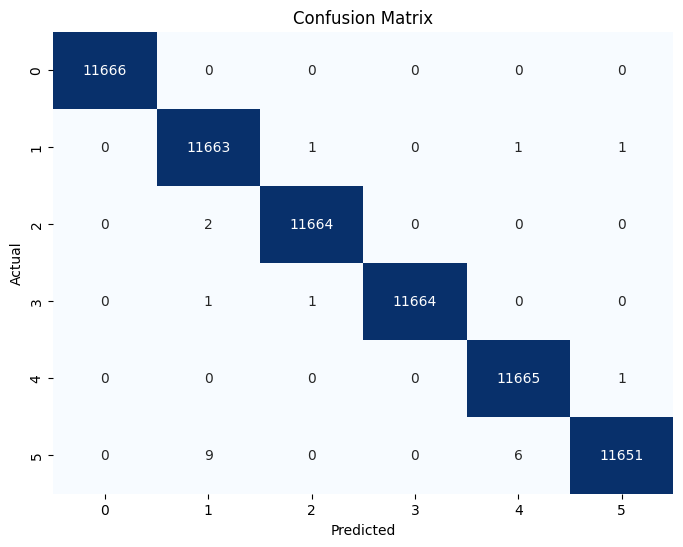

In [128]:
evaluate_model(lgbm_model,rfe_train,y_train_resampled)

## Perceptron

In [129]:
per_model = Perceptron(
    random_state=1729,
    eta0=1,
    max_iter=4,
    shuffle=False,
    fit_intercept=True,
    penalty=None
)



In [130]:
per_model.fit(rfe_train,y_train_resampled)
per_model_y_pred=per_model.predict(rfe_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11666
           1       0.00      0.00      0.00     11666
           2       0.00      0.00      0.00     11666
           3       0.00      0.00      0.00     11666
           4       0.00      0.00      0.00     11666
           5       0.17      1.00      0.29     11666

    accuracy                           0.17     69996
   macro avg       0.03      0.17      0.05     69996
weighted avg       0.03      0.17      0.05     69996



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


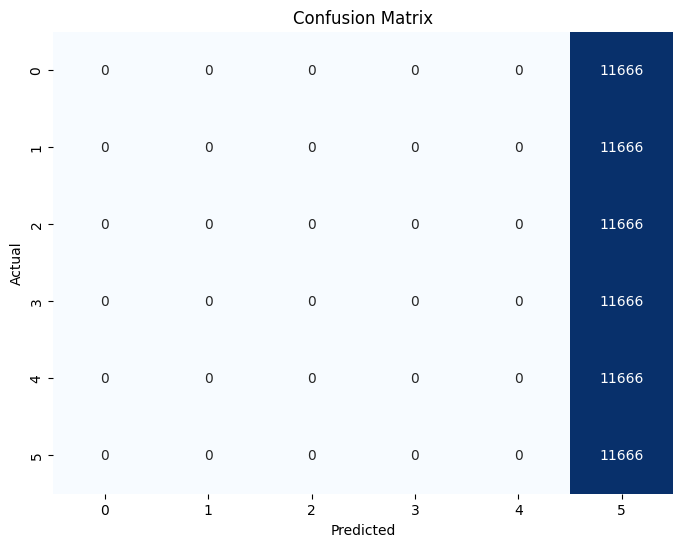

In [131]:
evaluate_model(per_model,rfe_train,y_train_resampled)

## XGBClassifier

In [132]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [133]:
xgb_model.fit(rfe_train,y_train_resampled)
xgb_model_y_pred=xgb_model.predict(rfe_test)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11666
           1       1.00      0.99      1.00     11666
           2       1.00      1.00      1.00     11666
           3       1.00      1.00      1.00     11666
           4       1.00      1.00      1.00     11666
           5       1.00      1.00      1.00     11666

    accuracy                           1.00     69996
   macro avg       1.00      1.00      1.00     69996
weighted avg       1.00      1.00      1.00     69996



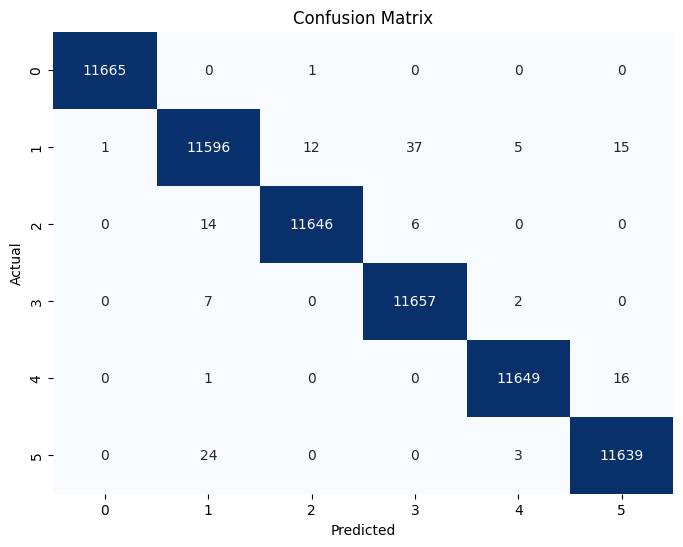

In [134]:
evaluate_model(xgb_model,rfe_train,y_train_resampled)

## GBC

In [135]:
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [136]:
gbc_model.fit(rfe_train,y_train_resampled)
gbc_model_y_pred=gbc_model.predict(rfe_test)

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11666
           1       0.96      0.91      0.94     11666
           2       0.99      0.98      0.99     11666
           3       0.92      0.99      0.95     11666
           4       0.99      0.99      0.99     11666
           5       0.97      0.96      0.97     11666

    accuracy                           0.97     69996
   macro avg       0.97      0.97      0.97     69996
weighted avg       0.97      0.97      0.97     69996



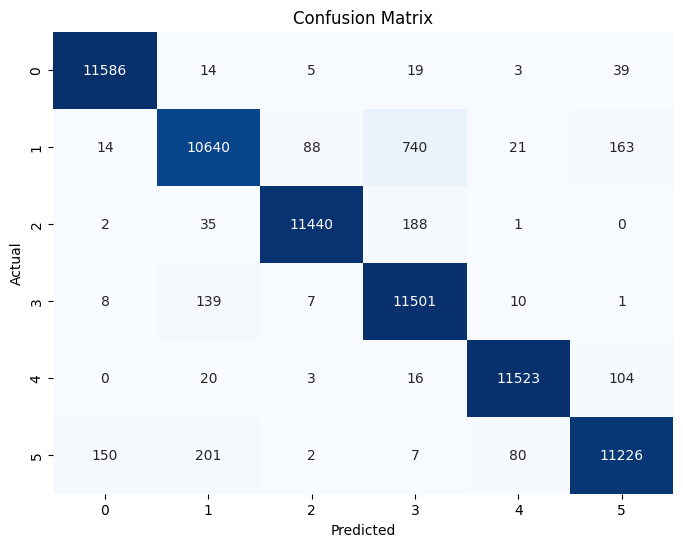

In [137]:
evaluate_model(gbc_model,rfe_train,y_train_resampled)

## ExtraTreesClassifier

In [138]:
etc_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

In [139]:
etc_model.fit(rfe_train,y_train_resampled)
etc_model_y_pred=etc_model.predict(rfe_test)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11666
           1       1.00      1.00      1.00     11666
           2       1.00      1.00      1.00     11666
           3       1.00      1.00      1.00     11666
           4       1.00      1.00      1.00     11666
           5       1.00      1.00      1.00     11666

    accuracy                           1.00     69996
   macro avg       1.00      1.00      1.00     69996
weighted avg       1.00      1.00      1.00     69996



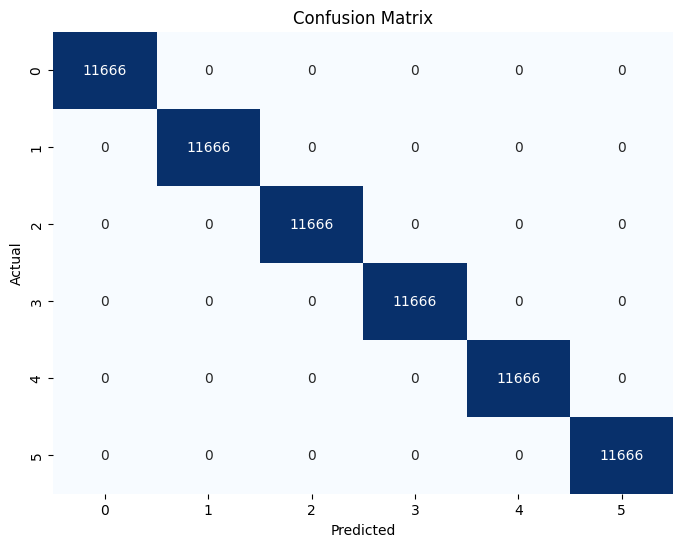

In [140]:
evaluate_model(etc_model,rfe_train,y_train_resampled)

## Random Forest

In [141]:
rf_model = RandomForestClassifier(random_state=42)

In [142]:
rf_model.fit(rfe_train,y_train_resampled)
rf_model_y_pred=rf_model.predict(rfe_test)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11666
           1       1.00      1.00      1.00     11666
           2       1.00      1.00      1.00     11666
           3       1.00      1.00      1.00     11666
           4       1.00      1.00      1.00     11666
           5       1.00      1.00      1.00     11666

    accuracy                           1.00     69996
   macro avg       1.00      1.00      1.00     69996
weighted avg       1.00      1.00      1.00     69996



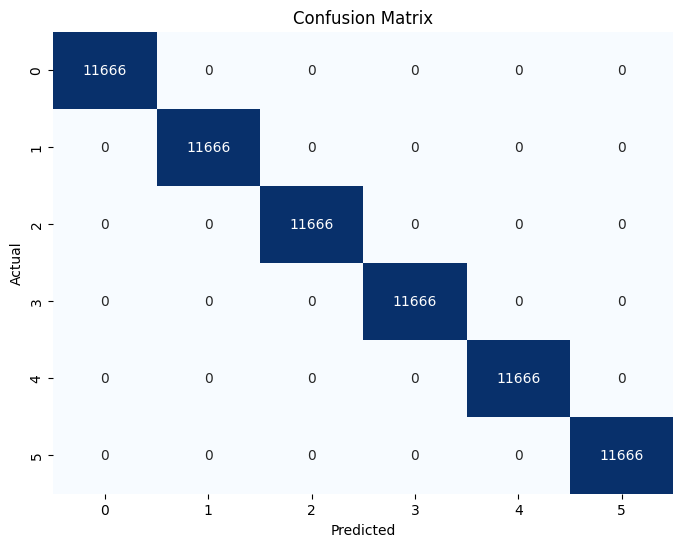

In [143]:
evaluate_model(rf_model,rfe_train,y_train_resampled)

## Bagging

In [144]:
bg_model=BaggingClassifier()

In [145]:
bg_model.fit(rfe_train,y_train_resampled)
bg_model_y_pred=bg_model.predict(rfe_test)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11666
           1       1.00      1.00      1.00     11666
           2       1.00      1.00      1.00     11666
           3       1.00      1.00      1.00     11666
           4       1.00      1.00      1.00     11666
           5       1.00      1.00      1.00     11666

    accuracy                           1.00     69996
   macro avg       1.00      1.00      1.00     69996
weighted avg       1.00      1.00      1.00     69996



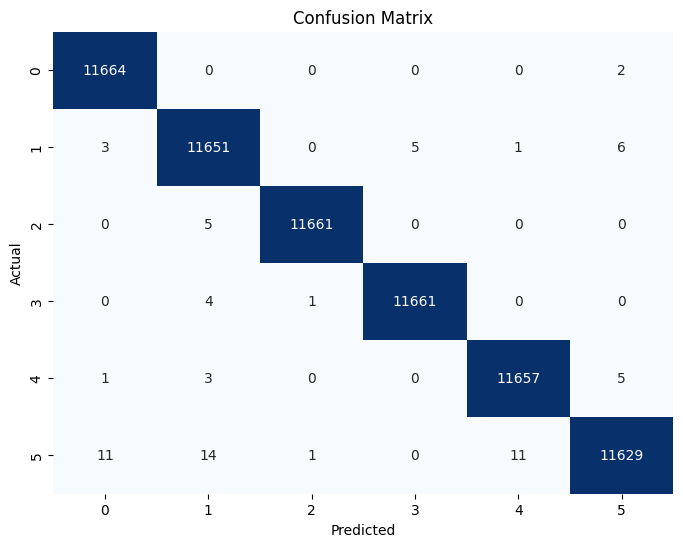

In [146]:
evaluate_model(bg_model,rfe_train,y_train_resampled)

## Decision Tree Classifier


In [147]:
dtc_model=DecisionTreeClassifier(
    criterion='entropy',         
    max_depth=10,                
    min_samples_split=5,         
    min_samples_leaf=3,          
    max_features='sqrt',        
    max_leaf_nodes=20,           
    random_state=42            
)

In [148]:
dtc_model.fit(rfe_train,y_train_resampled)
dtc_model_y_pred=dtc_model.predict(rfe_test)

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.72      0.80     11666
           1       0.47      0.52      0.49     11666
           2       0.63      0.76      0.69     11666
           3       0.49      0.30      0.38     11666
           4       0.48      0.58      0.52     11666
           5       0.66      0.69      0.67     11666

    accuracy                           0.60     69996
   macro avg       0.60      0.60      0.59     69996
weighted avg       0.60      0.60      0.59     69996



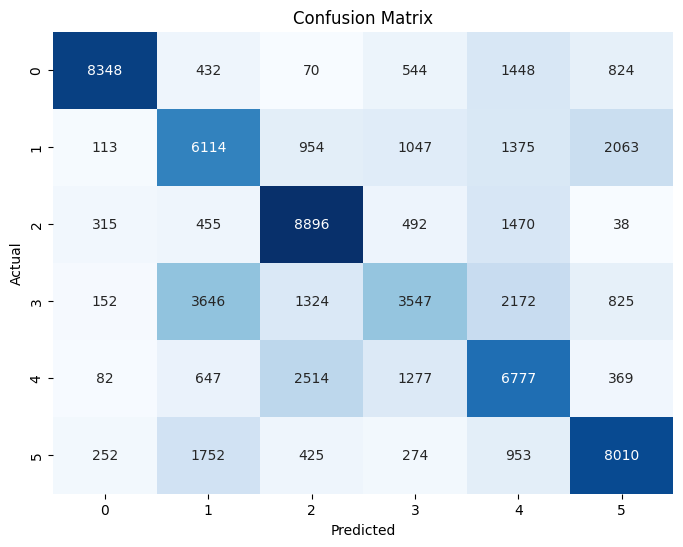

In [149]:
evaluate_model(dtc_model,rfe_train,y_train_resampled)

# Final Submission

In [150]:
y_pred =label_encoder.inverse_transform(lgbm_model_y_pred)
submission_data = pd.DataFrame({
    'ID': range(1, len(test_data) + 1),  
    'Crime_Category': y_pred
})

submission_data.to_csv('submission.csv', index=False)

# =======  THE END =======